In [ ]:
import os
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

# Data visualisation libraries
import plotly.offline as py # Plotly
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

import folium                               # for visualizing geospatial data
import seaborn as sns
import matplotlib.pyplot as plt             # for plotting graphs
from matplotlib import rcParams             # for validating
from folium.plugins import MarkerCluster    # for visualising clusters

In [ ]:
circuits = pd.read_csv('circuits.csv', encoding='ISO-8859-1')

In [ ]:
circuits_folium = circuits[['name', 'location', 'country', 'lat', 'lng']]
circuits_folium.head()

,name,location,country,lat,lng
0,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800
1,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800
2,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060
3,Circuit de Barcelona-Catalunya,MontmelÃ³,Spain,41.57000,2.26111
4,Istanbul Park,Istanbul,Turkey,40.95170,29.40500


In [ ]:
circuits_map = folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(circuits_map)
for i in range(len(circuits_folium)):
    lat = circuits_folium.iloc[i]['lat']
    lng = circuits_folium.iloc[i]['lng']
    radius = 5
    popup_text = circuits_folium.iloc[i]['name']
    folium.CircleMarker(location = [lat, lng], radius = radius,
                        popup = popup_text, fill = True).add_to(marker_cluster)
circuits_map

In [ ]:
country = circuits[['country', 'name']].groupby(['country'], as_index = False).count().sort_values(by = 'name', ascending = False)

In [ ]:
country = country[['country','name']][:10]
country.shape

(10, 2)

In [ ]:
# Sample data for climate descriptions
climate_data = {
    'country': ['USA', 'Canada', 'UK', 'Australia', 'Germany', 'France', 'Spain', 'Portugal', 'Italy', 'Belgium', 'Japan'],
    'climate_description': ['Temperate', 'Subarctic', 'Temperate', 'Arid', 'Temperate', 'Temperate', 'Mediterranean', 'Mediterranean', 'Mediterranean', 'Temperate', 'Temperate']
}

In [ ]:
# Merge the dataframes on the 'country' column
country = country.merge(pd.DataFrame(climate_data), on='country')

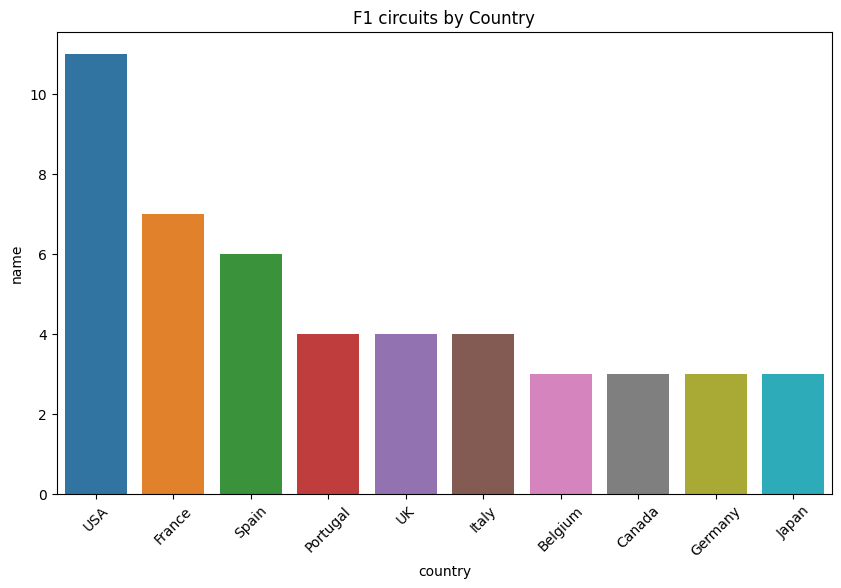

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Use Seaborn's barplot function
sns.barplot(data=country, x='country', y='name')

# Set the title
plt.title('F1 circuits by Country')

# Display the plot
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

In [ ]:
climate_data_grouped = country.groupby('climate_description')['name'].sum().reset_index()


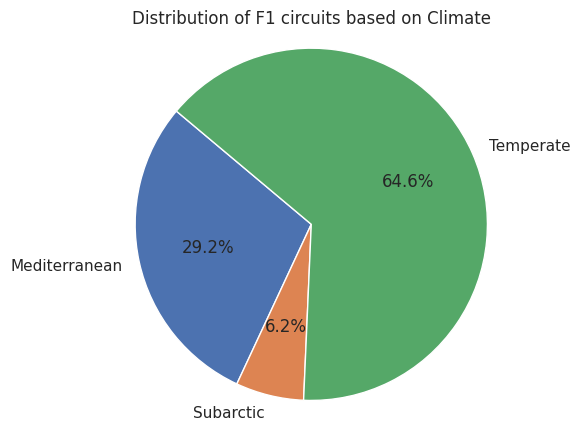

In [ ]:
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(climate_data_grouped['name'], labels=climate_data_grouped['climate_description'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of F1 circuits based on Climate')
plt.axis('equal')

# Use Seaborn to customize appearance
sns.set()
sns.despine(left=True, bottom=True)  # Remove the spines (borders) on the left and bottom

plt.show()

In [ ]:
races = pd.read_csv('races.csv')
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
win_count = races['name'].value_counts()
win_count = win_count.reset_index().head(30)

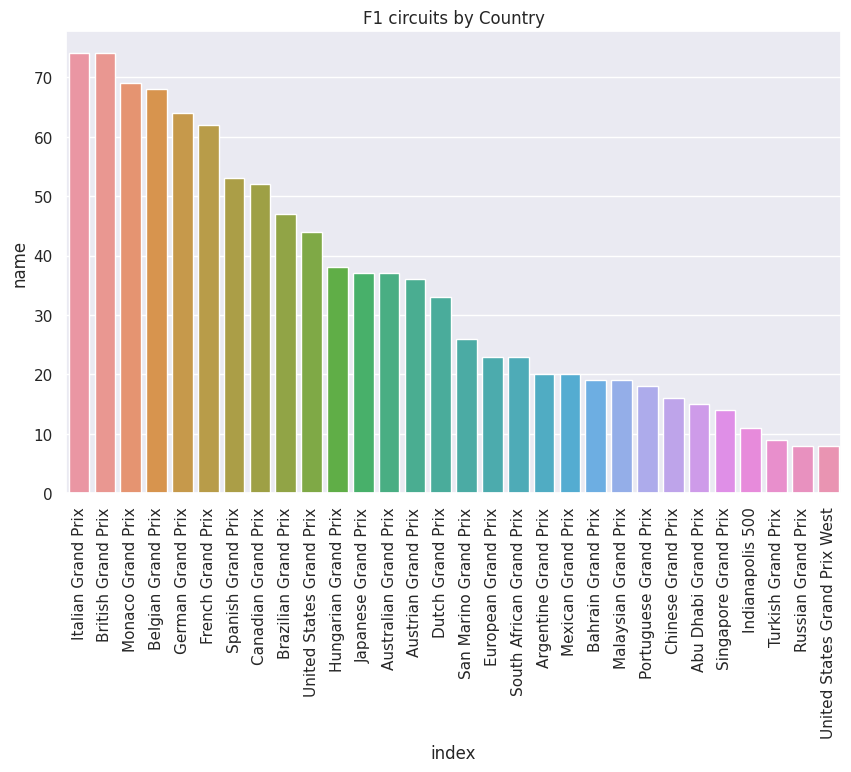

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Use Seaborn's barplot function
sns.barplot(data=win_count, x='index', y='name')

# Set the title
plt.title('F1 circuits by Country')

# Display the plot
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()

In [ ]:
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')

In [ ]:
# Merge all three datasets and filter out races before 2008
df1 = pd.merge(results, drivers, on = 'driverId')
df2 = pd.merge(df1, races, on = 'raceId')
results1 = df2
results2 = df2[df2.year > 2009]

In [ ]:
# Create driver name field from forename and surname
results2["driver"] = results2["forename"] + " " + results2["surname"]

In [ ]:
# Aggregate total points and average points per race
avg_pts = results2[['driver', 'points']].groupby("driver").mean()
total_pts = results2[['driver', 'points']].groupby("driver").sum()

In [ ]:
# Count number of races for each driver and filter out drivers with less than 100 races
n = results2[['driver', 'raceId']].groupby("driver").count()
num_races = n[n.raceId > 100]

In [ ]:
n.reset_index().sort_values(by = ['raceId']).tail(30)

,driver,raceId
47,Nicholas Latifi,61
4,Antonio Giovinazzi,62
30,Kamui Kobayashi,74
1,Alexander Albon,75
0,Adrian Sutil,76
41,Mark Webber,77
55,Pastor Maldonado,96
40,Marcus Ericsson,97
18,George Russell,98
35,Lando Norris,98


In [ ]:
n.reset_index()

,driver,raceId
0,Adrian Sutil,76
1,Alexander Albon,75
2,Alexander Rossi,5
3,André Lotterer,1
4,Antonio Giovinazzi,62
...,...,...
72,Valtteri Bottas,217
73,Vitaly Petrov,58
74,Vitantonio Liuzzi,37
75,Will Stevens,19


In [ ]:
# Merge the above summary tables and reset index to create column for driver name
d = pd.merge(avg_pts, total_pts, on = 'driver')
md = pd.merge(d, num_races, on = 'driver')
md = md.reset_index()

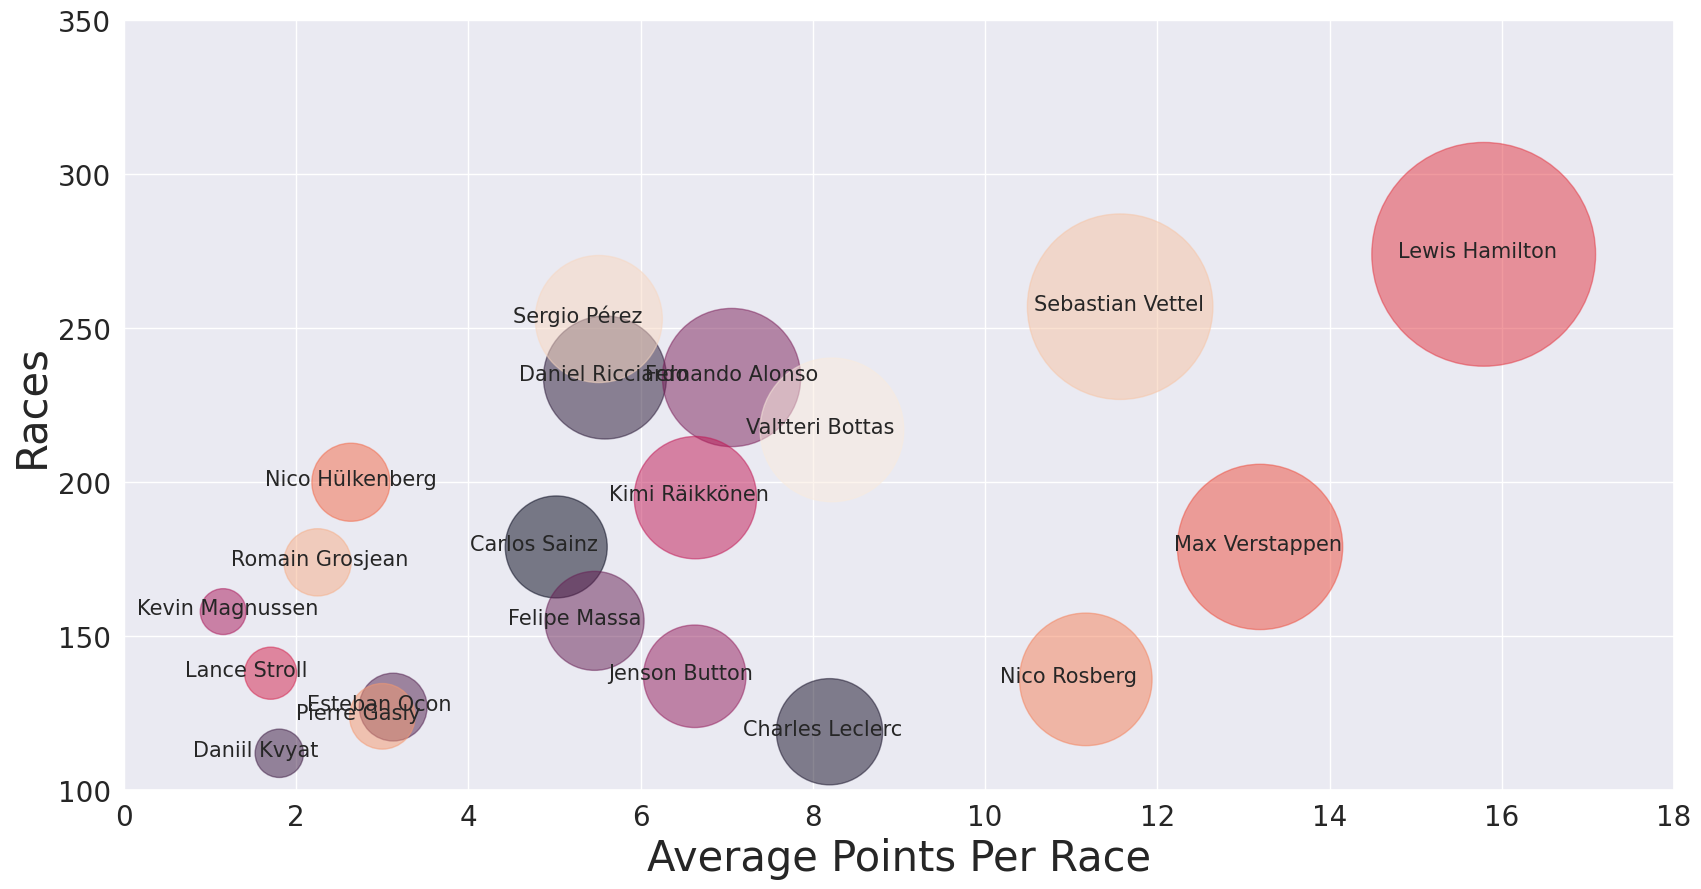

In [ ]:
# Create bubble chart with size of the bubble showing total points scored in the decade
plt.rc('font', size = 15)          # controls default text sizes
plt.rc('axes', titlesize = 30)     # fontsize of the axes title
plt.rc('axes', labelsize = 30)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = 20)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 20)    # fontsize of the tick labels
plt.rc('legend', fontsize = 30)    # legend fontsize
plt.rc('figure', titlesize = 30)   # fontsize of the figure title

plt.figure(figsize = (20, 10))
plt.scatter(md.points_x, md.raceId, s = md.points_y * 6, alpha = 0.5, c = md.index.to_series())
plt.xlim(0, 18)
plt.ylim(100, 350)

plt.xlabel("Average Points Per Race")
plt.ylabel("Races")

for x, y, z in zip(md.points_x, md.raceId, md.driver):
   plt.annotate(z, xy = (x - 1, y - 1))

In [ ]:
filelist = [file for file in os.listdir() if file.endswith('.csv')]
for file in filelist:
  exec("%s = pd.read_csv('%s')" % (file.split('.')[0],file))

In [ ]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
#Merging into 1 dataframe:
f1 = results.copy()
f1 = f1.merge(constructors, how='left', on='constructorId')
f1 = f1.merge(races, how='left', on='raceId')
f1 = f1.merge(circuits, how='left', on='circuitId')
f1 = f1.merge(drivers, how='left', on='driverId')
f1 = f1.merge(status, how='left', on='statusId')
f1.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,url_x,driverRef,number_y,code,forename,surname,dob,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,1,10.0,...,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Finished


In [ ]:
f1.shape

(26160, 56)

In [ ]:
track_use = f1[['year', 'name']].copy()
track_use = track_use.drop_duplicates(['year', 'name'])[['year', 'name']]
track_use = pd.DataFrame(track_use)
track_use = track_use.value_counts('name').reset_index()
track_use.columns = ['circuit', 'years_used']

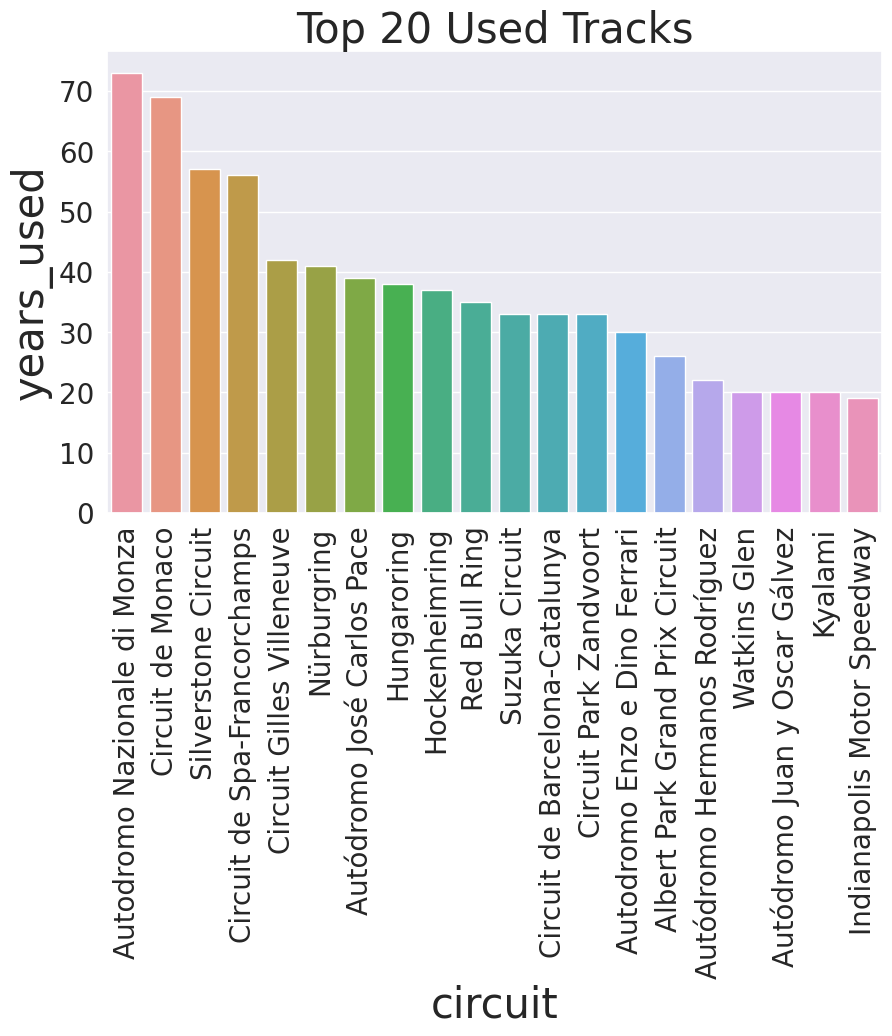

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Use Seaborn's barplot function
sns.barplot(data=track_use.head(20), x='circuit', y='years_used')

# Set the title
plt.title('Top 20 Used Tracks')

# Display the plot
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()

In [ ]:
fastest_lap = f1[['name', 'fastestLapTime', 'driverRef']].copy()
fastest_lap = fastest_lap.sort_values(by='fastestLapTime')
fastest_lap = fastest_lap.drop_duplicates(['name'])[['name', 'fastestLapTime', 'driverRef']].head(15)
fastest_lap

,name,fastestLapTime,driverRef
24928,Bahrain International Circuit,0:55.404,russell
24648,Red Bull Ring,1:05.619,sainz
1675,Indianapolis Motor Speedway,1:10.399,barrichello
24161,Autódromo José Carlos Pace,1:10.540,bottas
25201,Circuit Park Zandvoort,1:11.097,hamilton
25046,Circuit de Monaco,1:12.909,hamilton
24323,Circuit Gilles Villeneuve,1:13.078,bottas
1753,Hockenheimring,1:13.780,raikkonen
1694,Circuit de Nevers Magny-Cours,1:15.377,michael_schumacher
24860,Autodromo Enzo e Dino Ferrari,1:15.484,hamilton


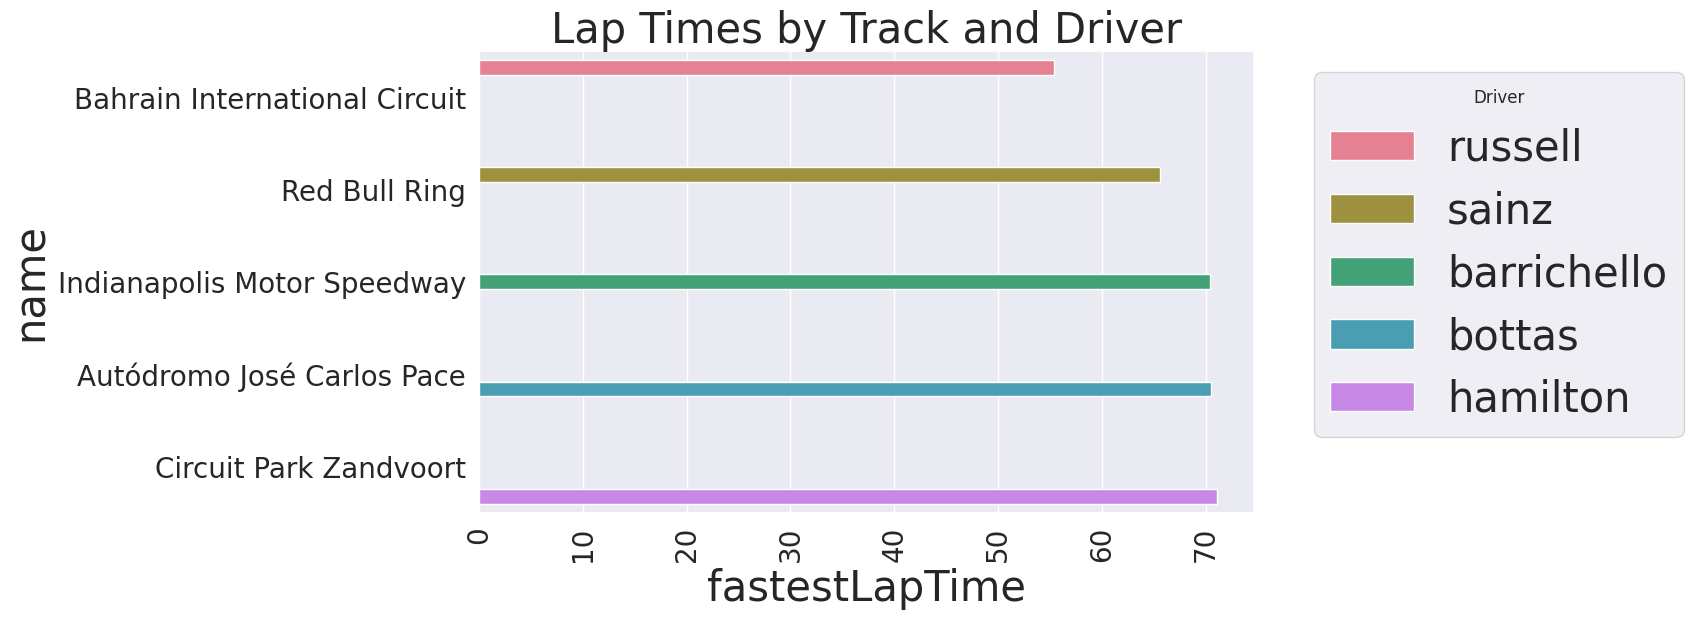

In [ ]:
# Convert lap time strings to numeric (in seconds)
df = fastest_lap.head(5)

# Custom function to convert lap time strings to seconds
def lap_time_to_seconds(lap_time):
    minutes, seconds = lap_time.split(':')
    return int(minutes) * 60 + float(seconds)

df['fastestLapTime'] = df['fastestLapTime'].apply(lap_time_to_seconds)

# Custom color palette for drivers
custom_palette = sns.color_palette("husl", len(df['driverRef'].unique()))


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, y='name', x='fastestLapTime', hue='driverRef', palette=custom_palette)
plt.title('Lap Times by Track and Driver')
plt.xticks(rotation=90)

# Move the legend outside the plot
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
results3 = driver_standings.merge(drivers, how = 'left', on = 'driverId')
results_filtered = results3[results3['position'] == 1]
results_filtered.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,number,code,forename,surname,dob,nationality,url
0,1,18,1,10.0,1,1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
8,9,19,1,14.0,1,1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
33,34,20,8,19.0,1,1,1,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
54,55,21,8,29.0,1,1,2,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
75,76,22,8,35.0,1,1,2,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...


In [ ]:
results4 = results_filtered['surname'].value_counts()
results4 = results4.head(5)
# Create a radar (spider) plot using Seaborn
# Create a radar (spider) plot using Matplotlib
plt.figure(figsize=(8, 6))
theta = range(len(results4))
values = results4.values

import plotly.graph_objects as go
from plotly.offline import iplot

# Create a radar (spider) plot using Plotly
radar = go.Scatterpolar(
    r=results4.values,
    theta=results4.index,
    fill='toself'
)

data = [radar]
fig = go.Figure(data=data)
# iplot(fig)
fig.show(renderer="colab")

<Figure size 800x600 with 0 Axes>

In [ ]:
constructor_standings = constructor_standings.fillna(0)

In [ ]:
constructors = constructor_standings.merge(constructors, how = 'left', on = 'constructorId')

In [ ]:
constructors_filtered = constructors[constructors['position'] == 1]
constructors_filtered.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name,nationality,url
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
6,7,19,1,24.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
18,19,20,2,30.0,1,1,0,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
33,34,21,6,47.0,1,1,3,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
44,45,22,6,63.0,1,1,4,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari


In [ ]:
# Top 5 Constructors by Race Wins

constructors2 = constructors_filtered['name'].value_counts()
constructors2 = constructors2.head(5)
radar = go.Scatterpolar(r = constructors2.values,
                        theta = constructors2.index,
                        fill = 'toself')

data = [radar]
fig = go.Figure(data = data)
fig.show(renderer="colab")

year                                                 2009
url     http://en.wikipedia.org/wiki/2009_Formula_One_...
Name: 0, dtype: object

EDA PART 2

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
base_path = '/content/gdrive/MyDrive/Final_Project_Datasets/F1_Data'

Mounted at /content/gdrive


In [2]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

In [12]:
base_path = '/content/gdrive/MyDrive/Final_Project_Datasets/F1_Data'
filelist = [file for file in os.listdir(base_path) if file.endswith('.csv')]
for file in filelist:
    print(file)
    exec("%s = pd.read_csv('%s/%s')" % (file.split('.')[0], base_path, file))

circuits.csv
seasons.csv
status.csv
constructor_standings.csv
pit_stops.csv
results.csv
drivers.csv
constructor_results.csv
constructors.csv
driver_standings.csv
qualifying.csv
races.csv
sprint_results.csv
lap_times.csv
weather_data_per_race.csv


In [13]:
i= 0
for i in globals().keys():
  if str(type(globals()[i])) == "<class 'pandas.core.frame.DataFrame'>":
    print(i)
    print(globals()[i].columns)

circuits
Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')
seasons
Index(['year', 'url'], dtype='object')
status
Index(['statusId', 'status'], dtype='object')
constructor_standings
Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins'],
      dtype='object')
pit_stops
Index(['raceId', 'driverId', 'stop', 'lap', 'time', 'duration',
       'milliseconds'],
      dtype='object')
results
Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')
drivers
Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')
constructor_results
Index(['constructorResultsId', 'raceId', 'co

Analyze the altitude distribution of the circuits.

In [14]:
circuits['alt'] = circuits['alt'].replace('\\N', np.nan)
circuits['alt'] = circuits['alt'].astype(float)
circuits['alt'].describe()

count      74.000000
mean      248.189189
std       365.041851
min        -7.000000
25%        19.250000
50%       129.500000
75%       315.500000
max      2227.000000
Name: alt, dtype: float64

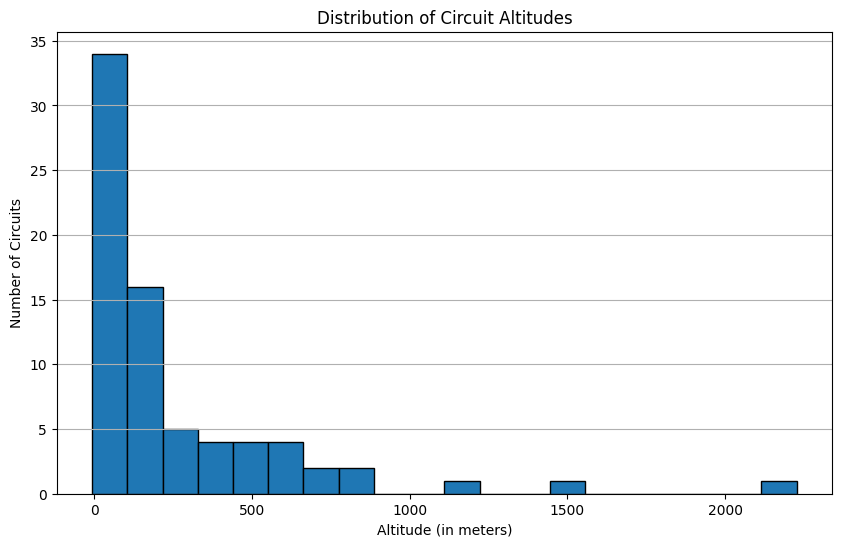

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(circuits['alt'], bins=20, edgecolor='k')
plt.title('Distribution of Circuit Altitudes')
plt.xlabel('Altitude (in meters)')
plt.ylabel('Number of Circuits')
plt.grid(axis='y')
plt.show()


In [16]:
max_alt = circuits['alt'].max()
min_alt = circuits['alt'].min()

highest_circuits = circuits[circuits['alt'] == max_alt]['name'].tolist()
lowest_circuits = circuits[circuits['alt'] == min_alt]['name'].tolist()

print(f"Circuits at highest altitude ({max_alt} meters): {', '.join(highest_circuits)}")
print(f"Circuits at lowest altitude ({min_alt} meters): {', '.join(lowest_circuits)}")


Circuits at highest altitude (2227.0 meters): Autódromo Hermanos Rodríguez
Circuits at lowest altitude (-7.0 meters): Baku City Circuit


1. Analyze average pit stop duration by driver or team:
By Driver:

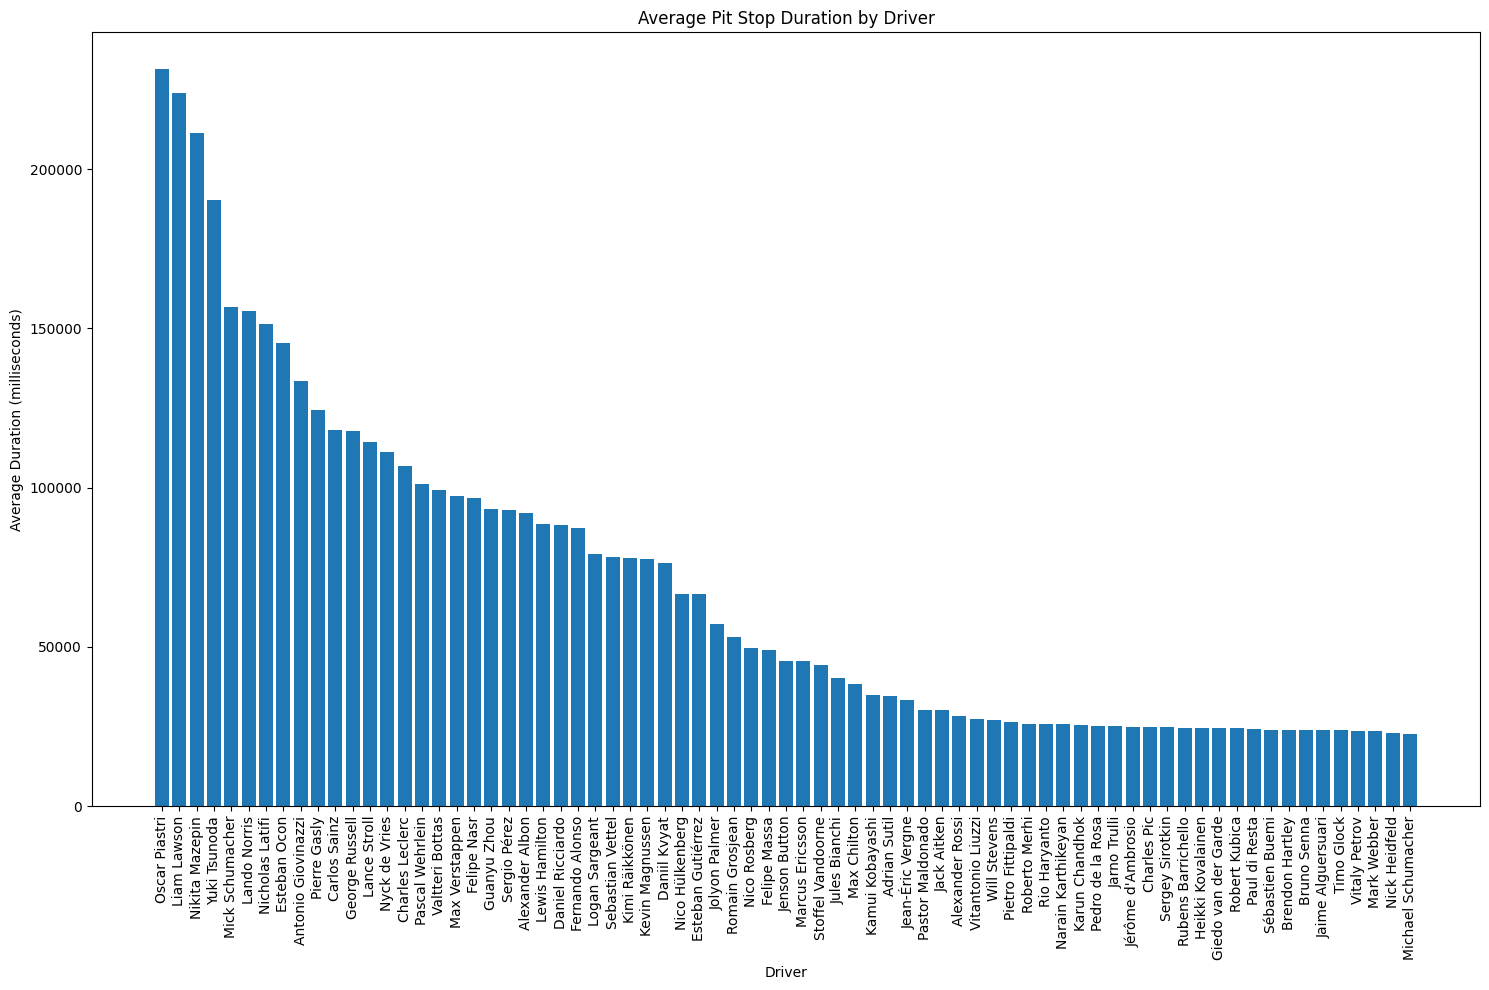

In [20]:
import pandas as pd

# Assuming `pit_stops` dataframe and `drivers` dataframe have been read into memory
average_pit_duration_by_driver = pit_stops.groupby('driverId')['milliseconds'].mean().reset_index()

# Join with drivers dataframe to get driver names
average_pit_duration_by_driver = average_pit_duration_by_driver.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')
average_pit_duration_by_driver['driverName'] = average_pit_duration_by_driver['forename'] + ' ' + average_pit_duration_by_driver['surname']

# Sort by average duration for better visualization
average_pit_duration_by_driver = average_pit_duration_by_driver.sort_values(by='milliseconds', ascending=False)

# Plot
plt.figure(figsize=(15, 10))
plt.bar(average_pit_duration_by_driver['driverName'], average_pit_duration_by_driver['milliseconds'])
plt.xticks(rotation=90)
plt.title('Average Pit Stop Duration by Driver')
plt.xlabel('Driver')
plt.ylabel('Average Duration (milliseconds)')
plt.tight_layout()
plt.show()


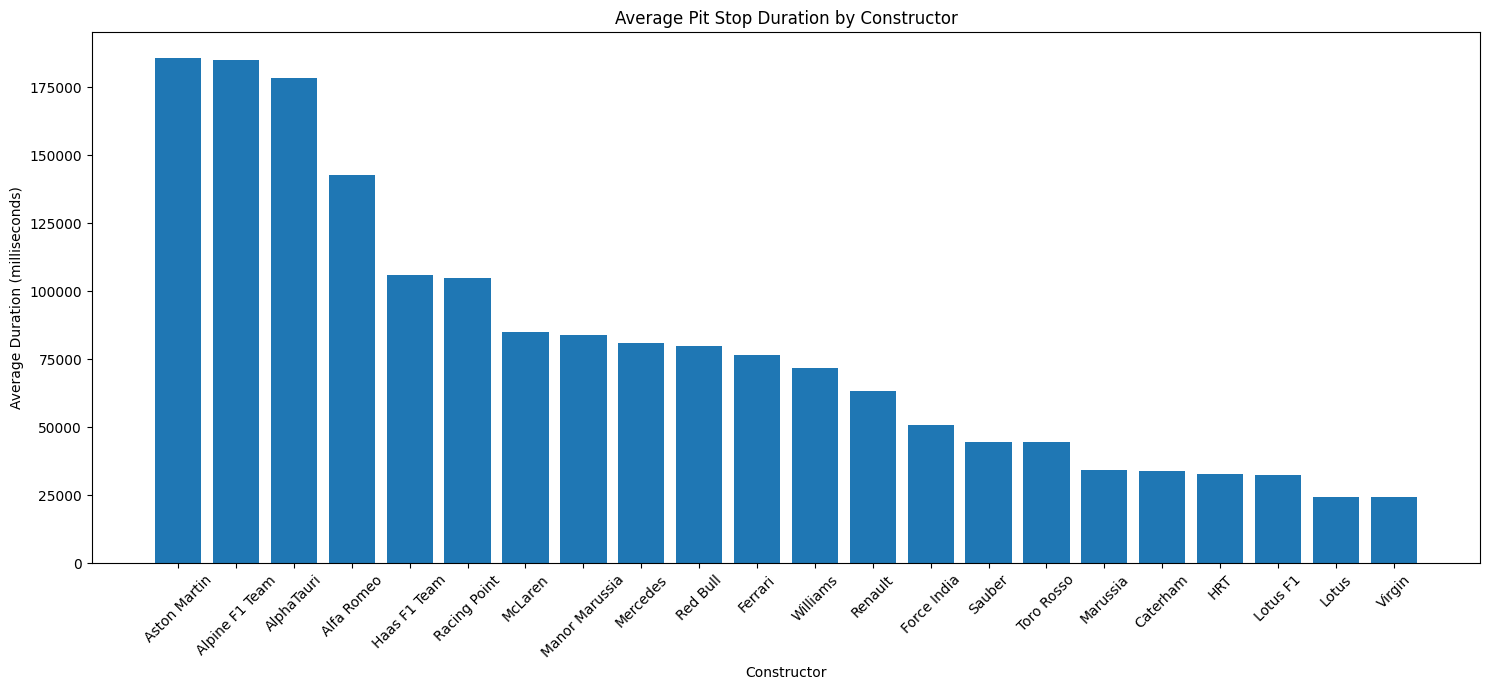

In [21]:
# Join pit_stops with results to get constructorId for each pit stop
pit_stops_with_constructors = pit_stops.merge(results[['raceId', 'driverId', 'constructorId']], on=['raceId', 'driverId'])

average_pit_duration_by_constructor = pit_stops_with_constructors.groupby('constructorId')['milliseconds'].mean().reset_index()

# Join with constructors dataframe to get constructor names
average_pit_duration_by_constructor = average_pit_duration_by_constructor.merge(constructors[['constructorId', 'name']], on='constructorId')

# Sort and plot
average_pit_duration_by_constructor = average_pit_duration_by_constructor.sort_values(by='milliseconds', ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(average_pit_duration_by_constructor['name'], average_pit_duration_by_constructor['milliseconds'])
plt.xticks(rotation=45)
plt.title('Average Pit Stop Duration by Constructor')
plt.xlabel('Constructor')
plt.ylabel('Average Duration (milliseconds)')
plt.tight_layout()
plt.show()


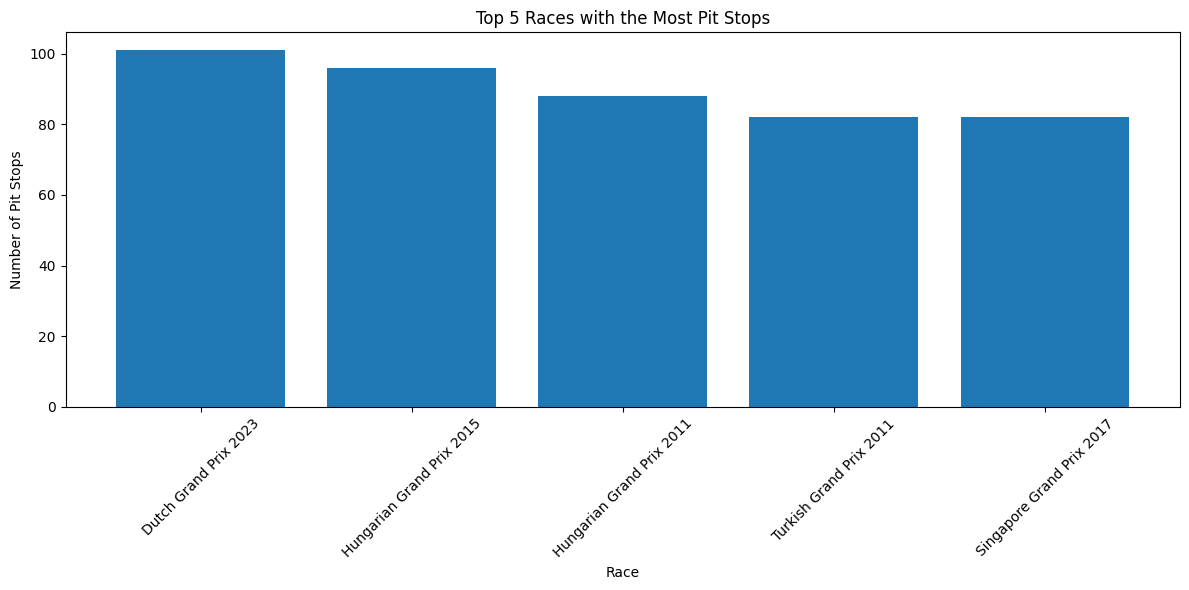

In [24]:
# Group by raceId to get count of pit stops for each race
race_pit_stops_counts = pit_stops.groupby('raceId').size().reset_index(name='pitStopCount')

# Join with the races dataset to get the name and year of the race
race_pit_stops_counts = race_pit_stops_counts.merge(races[['raceId', 'name', 'year']], on='raceId')

# Sort by pitStopCount in descending order and get the top 5 races
top_5_races = race_pit_stops_counts.sort_values(by='pitStopCount', ascending=False).head(5)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_5_races['name'] + ' ' + top_5_races['year'].astype(str), top_5_races['pitStopCount'])
plt.ylabel('Number of Pit Stops')
plt.xlabel('Race')
plt.title('Top 5 Races with the Most Pit Stops')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


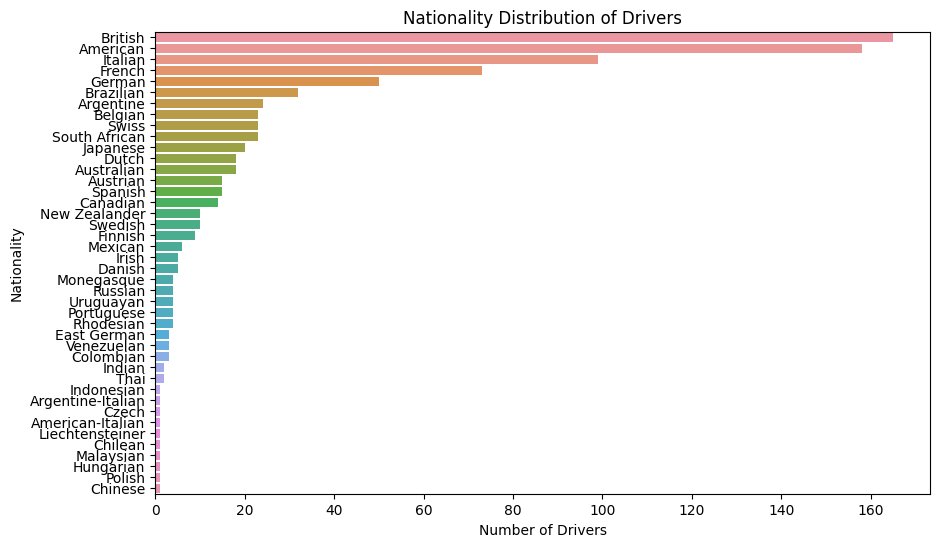

In [26]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=drivers, y='nationality', order=drivers['nationality'].value_counts().index)
plt.xlabel('Number of Drivers')
plt.ylabel('Nationality')
plt.title('Nationality Distribution of Drivers')
plt.show()

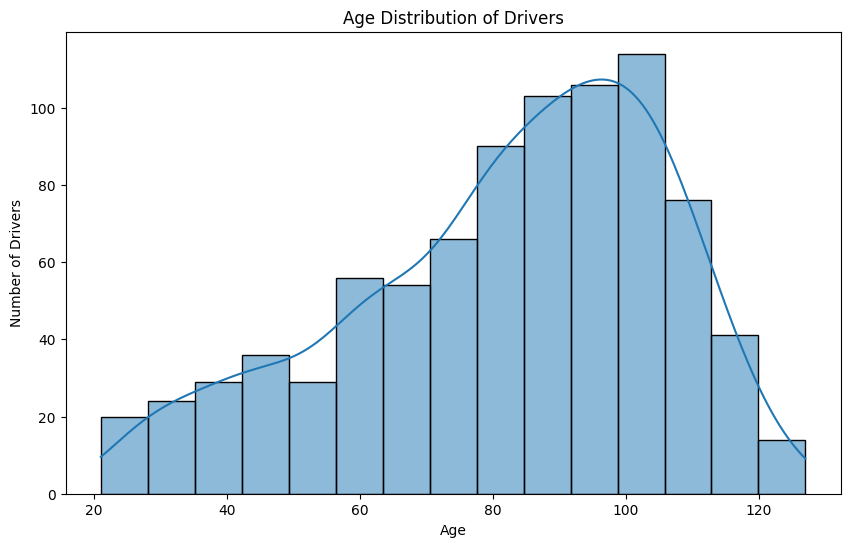

In [29]:
drivers['dob'] = pd.to_datetime(drivers['dob'])
current_year = pd.Timestamp.now().year
drivers['age'] = current_year - drivers['dob'].dt.year


plt.figure(figsize=(10, 6))
sns.histplot(data=drivers, x='age', kde=True)
plt.xlabel('Age')
plt.ylabel('Number of Drivers')
plt.title('Age Distribution of Drivers')
plt.show()


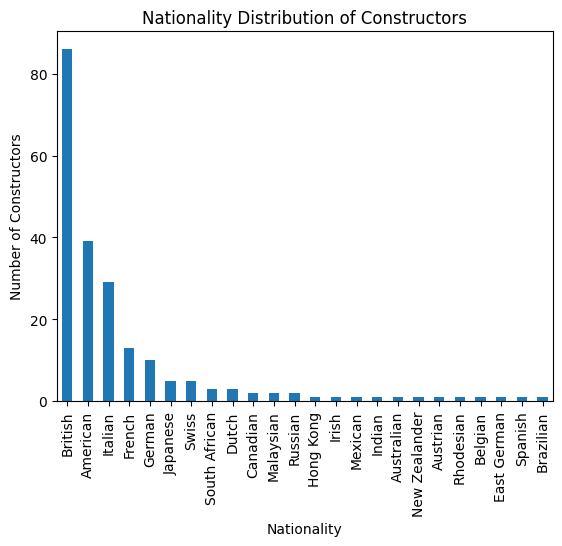

In [30]:
constructors['nationality'].value_counts().plot(kind='bar')
plt.xlabel('Nationality')
plt.ylabel('Number of Constructors')
plt.title('Nationality Distribution of Constructors')
plt.show()

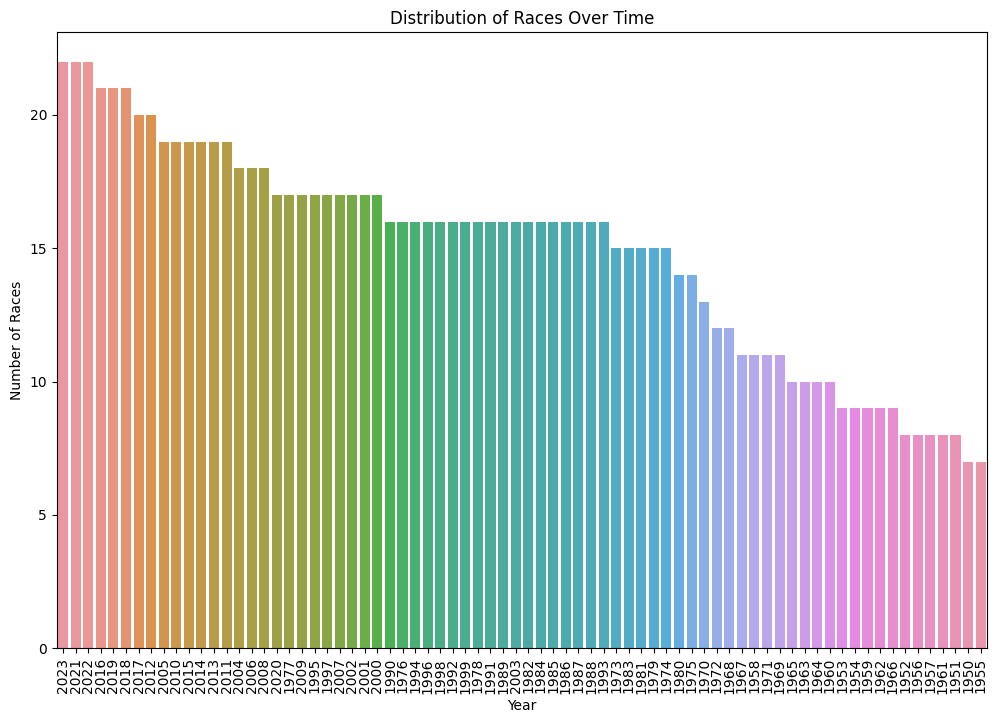

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(data=races, x='year', order = races['year'].value_counts().index)
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of Races')
plt.title('Distribution of Races Over Time')
plt.show()

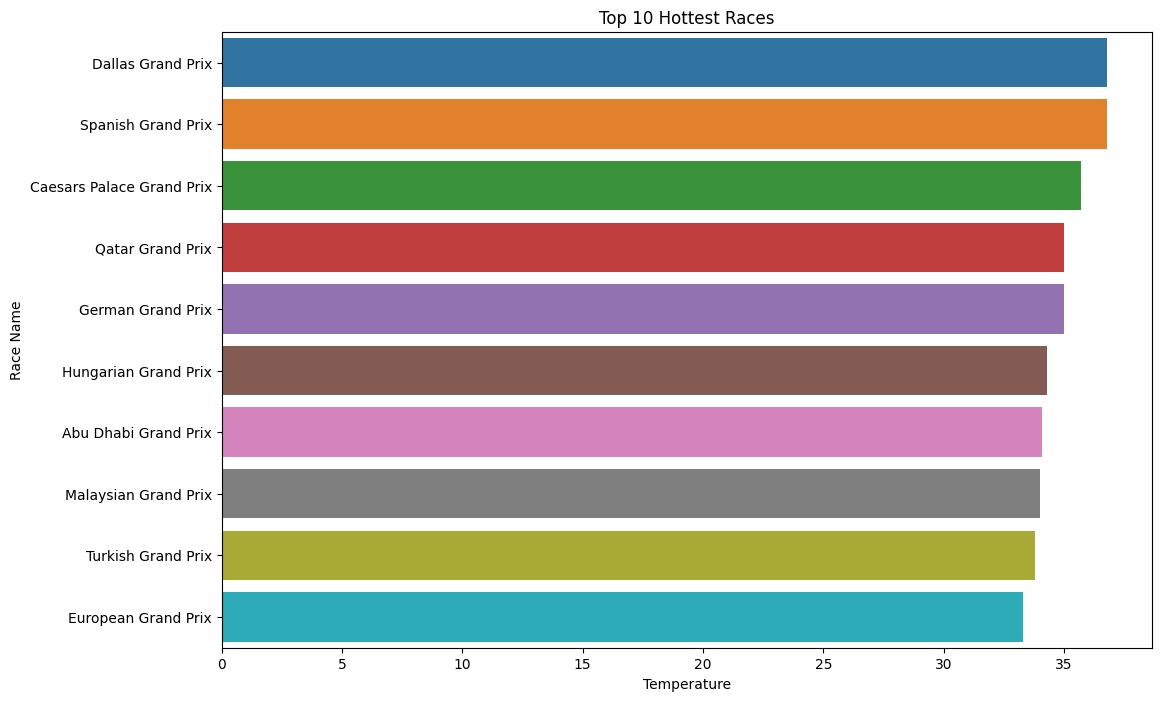

In [38]:
plt.figure(figsize=(12, 8))
hot_races = weather_data_per_race.sort_values(by='temp', ascending=False).head(10)
sns.barplot(data=hot_races, x='temp', y='name')
plt.xlabel('Temperature')
plt.ylabel('Race Name')
plt.title('Top 10 Hottest Races')
plt.show()


CORRELATION BETWEEN sprint position and race position

In [39]:
correlation_sprint = sprint_results['positionOrder'].corr(results['positionOrder'])
print(correlation_sprint)


-0.14858608449313998


In [40]:
#Races with closest lap times
lap_time_variance = lap_times.groupby('raceId')['milliseconds'].std().sort_values()
print(lap_time_variance.head())


raceId
1018    2782.179222
1102    2875.777199
1056    3054.318972
977     3156.361666
1008    3198.438871
Name: milliseconds, dtype: float64


In [42]:
merged_df = pd.merge(results, drivers, on='driverId', how='left')

# Merge the above with races
merged_df = pd.merge(merged_df, races, on='raceId', how='left')

# Merge with qualifying data
merged_df = pd.merge(merged_df, qualifying, on=['raceId', 'driverId'], how='left', suffixes=('', '_qualifying'))

# Merge with lap_times - this can be a bit more involved because lap_times is a time series within each race.
# For simplicity, let's take the average lap time for each driver in each race.
avg_lap_times = lap_times.groupby(['raceId', 'driverId']).mean().reset_index()
merged_df = pd.merge(merged_df, avg_lap_times, on=['raceId', 'driverId'], how='left', suffixes=('', '_lap_times'))

# Merge with weather data
merged_df = pd.merge(merged_df, weather_data_per_race, on='raceId', how='left', suffixes=('', '_weather'))

In [44]:
merged_df['podium'] = merged_df['positionOrder'].apply(lambda x: 1 if x in [1, 2, 3] else 0)


In [46]:
columns_of_interest = ['grid', 'fastestLapSpeed', 'laps', 'q1', 'q2', 'q3', 'temp', 'rhum', 'wspd', 'podium']  # Just a few examples; add more as needed
correlation_matrix = merged_df[columns_of_interest].corr()


In [48]:
correlation_matrix

,grid,laps,temp,rhum,wspd,podium
grid,1.000000,0.074854,-0.006173,0.003487,-0.010387,-0.361800
laps,0.074854,1.000000,0.061753,-0.044502,0.024311,0.240635
temp,-0.006173,0.061753,1.000000,-0.491115,-0.067094,0.009579
rhum,0.003487,-0.044502,-0.491115,1.000000,-0.033438,-0.002224
wspd,-0.010387,0.024311,-0.067094,-0.033438,1.000000,-0.002695
podium,-0.361800,0.240635,0.009579,-0.002224,-0.002695,1.000000


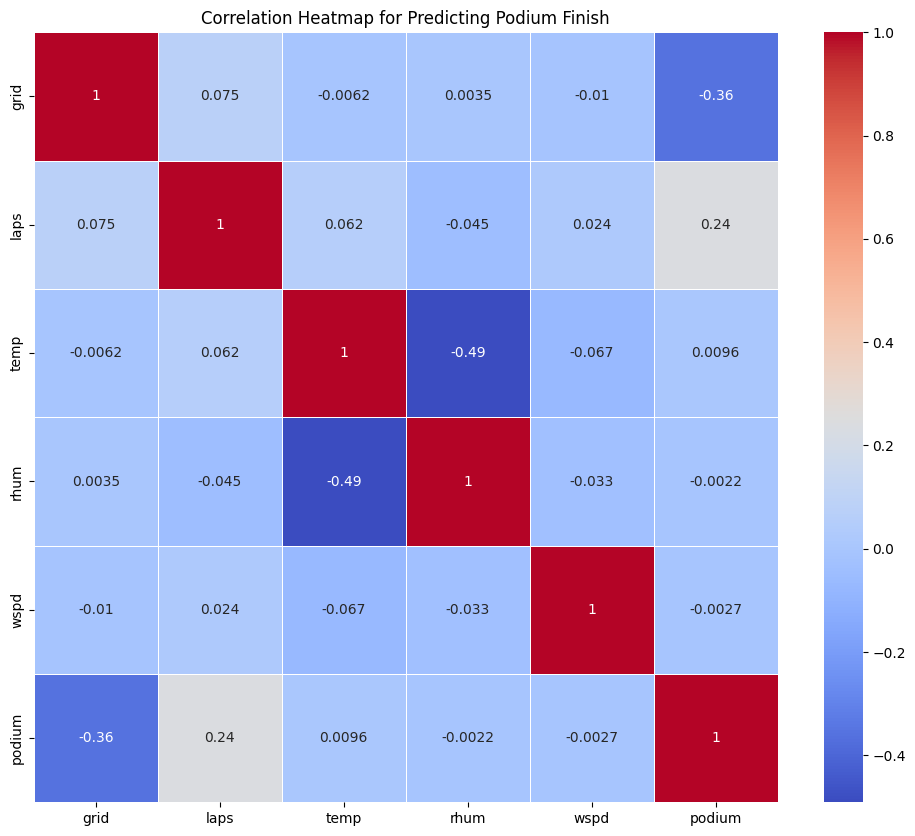

In [47]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Predicting Podium Finish')
plt.show()


Grid vs. Podium (-0.361800): A negative correlation, suggesting that drivers starting in front (lower grid numbers) have a higher chance of finishing on the podium. This makes sense, as starting at the front can provide a competitive advantage.

Laps vs. Podium (0.240635): A positive correlation indicates that the more laps a driver completes, the more likely they are to finish on the podium. This is intuitive; if a driver completes more laps, they probably didn't crash or face technical difficulties.

Temp vs. Podium (0.009579): This almost zero correlation suggests that temperature doesn't have a strong direct effect on podium finishes.

Rhum (Relative Humidity) vs. Podium (-0.002224): Similar to temperature, the relative humidity doesn't seem to influence the likelihood of a podium finish.

Wspd (Wind Speed) vs. Podium (-0.002695): Wind speed also shows little correlation with podium finishes.

Key Takeaways:

Grid position is a strong predictor for podium finishes. The better the grid position, the better the chance of finishing on the podium.

Completed Laps also correlate with podium finishes, but it's more of an indicator than a cause. If a driver finishes more laps, they're just more likely to be in the race till the end.

Weather conditions (as given by temp, rhum, and wspd) don't seem to have a significant direct effect on podium finishes based on this data. However, these factors might influence other race aspects like pit stop strategy, tire wear, etc., which in turn might affect race outcomes.

**Performance Analytics**:

Circuit Specialization: Determine if certain drivers or teams perform particularly well on specific circuits.



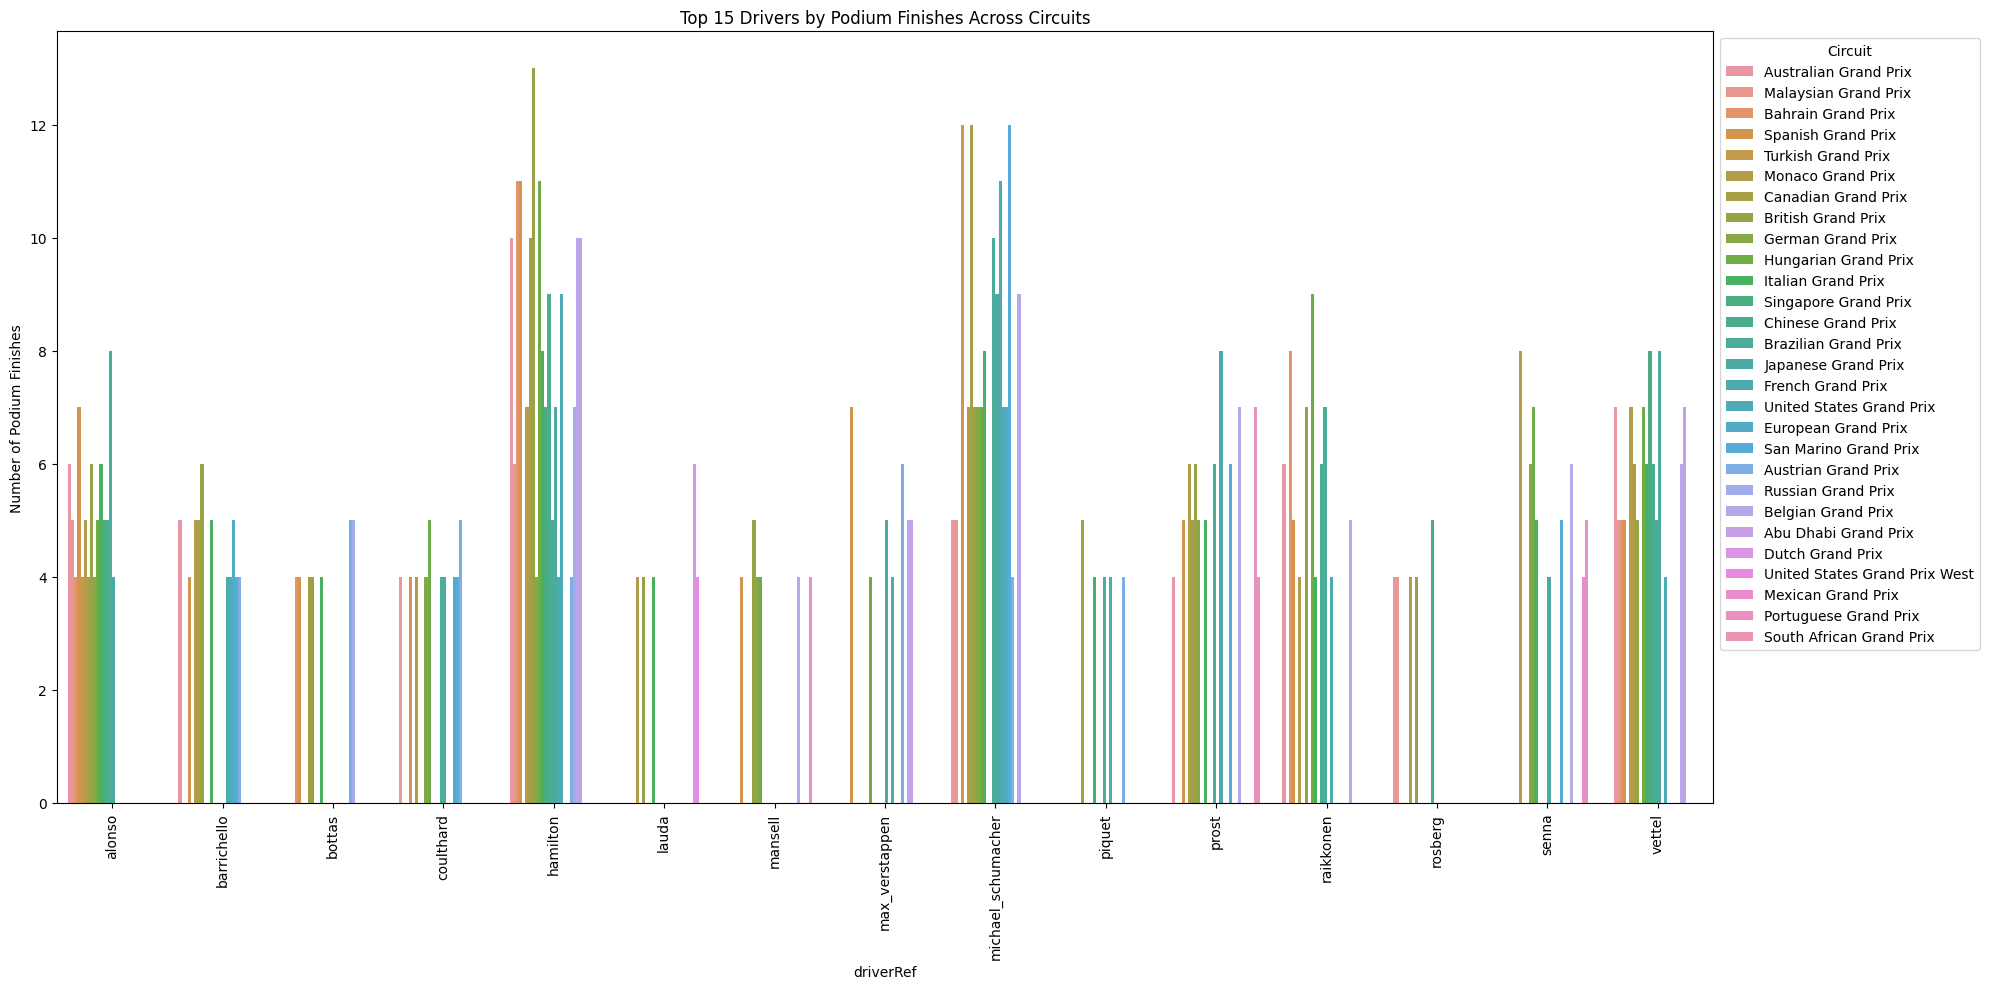

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge datasets
merged_df = results.merge(drivers, on='driverId', how='left').merge(races, on='raceId', how='left').merge(constructors, on='constructorId', how='left')

# Create a podium variable
merged_df['podium'] = merged_df['positionOrder'].apply(lambda x: 1 if x <= 3 else 0)

top_15_drivers = merged_df.groupby('driverRef')['podium'].sum().nlargest(15).index.tolist()

# Filter the merged dataset for these top drivers
top_drivers_df = merged_df[merged_df['driverRef'].isin(top_15_drivers)]

# Group by driver and circuit and sum the podiums
driver_circuit_df = top_drivers_df.groupby(['driverRef', 'circuitId', 'name_x'])['podium'].sum().reset_index()

# Filter for circuits where a driver has at least, say, 3 podium finishes
top_performers_df = driver_circuit_df[driver_circuit_df['podium'] > 3]

# Visualization
plt.figure(figsize=(20,10))
sns.barplot(x='driverRef', y='podium', hue='name_x', data=top_performers_df)
plt.title('Top 15 Drivers by Podium Finishes Across Circuits')
plt.ylabel('Number of Podium Finishes')
plt.xticks(rotation=90)
plt.legend(title='Circuit', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


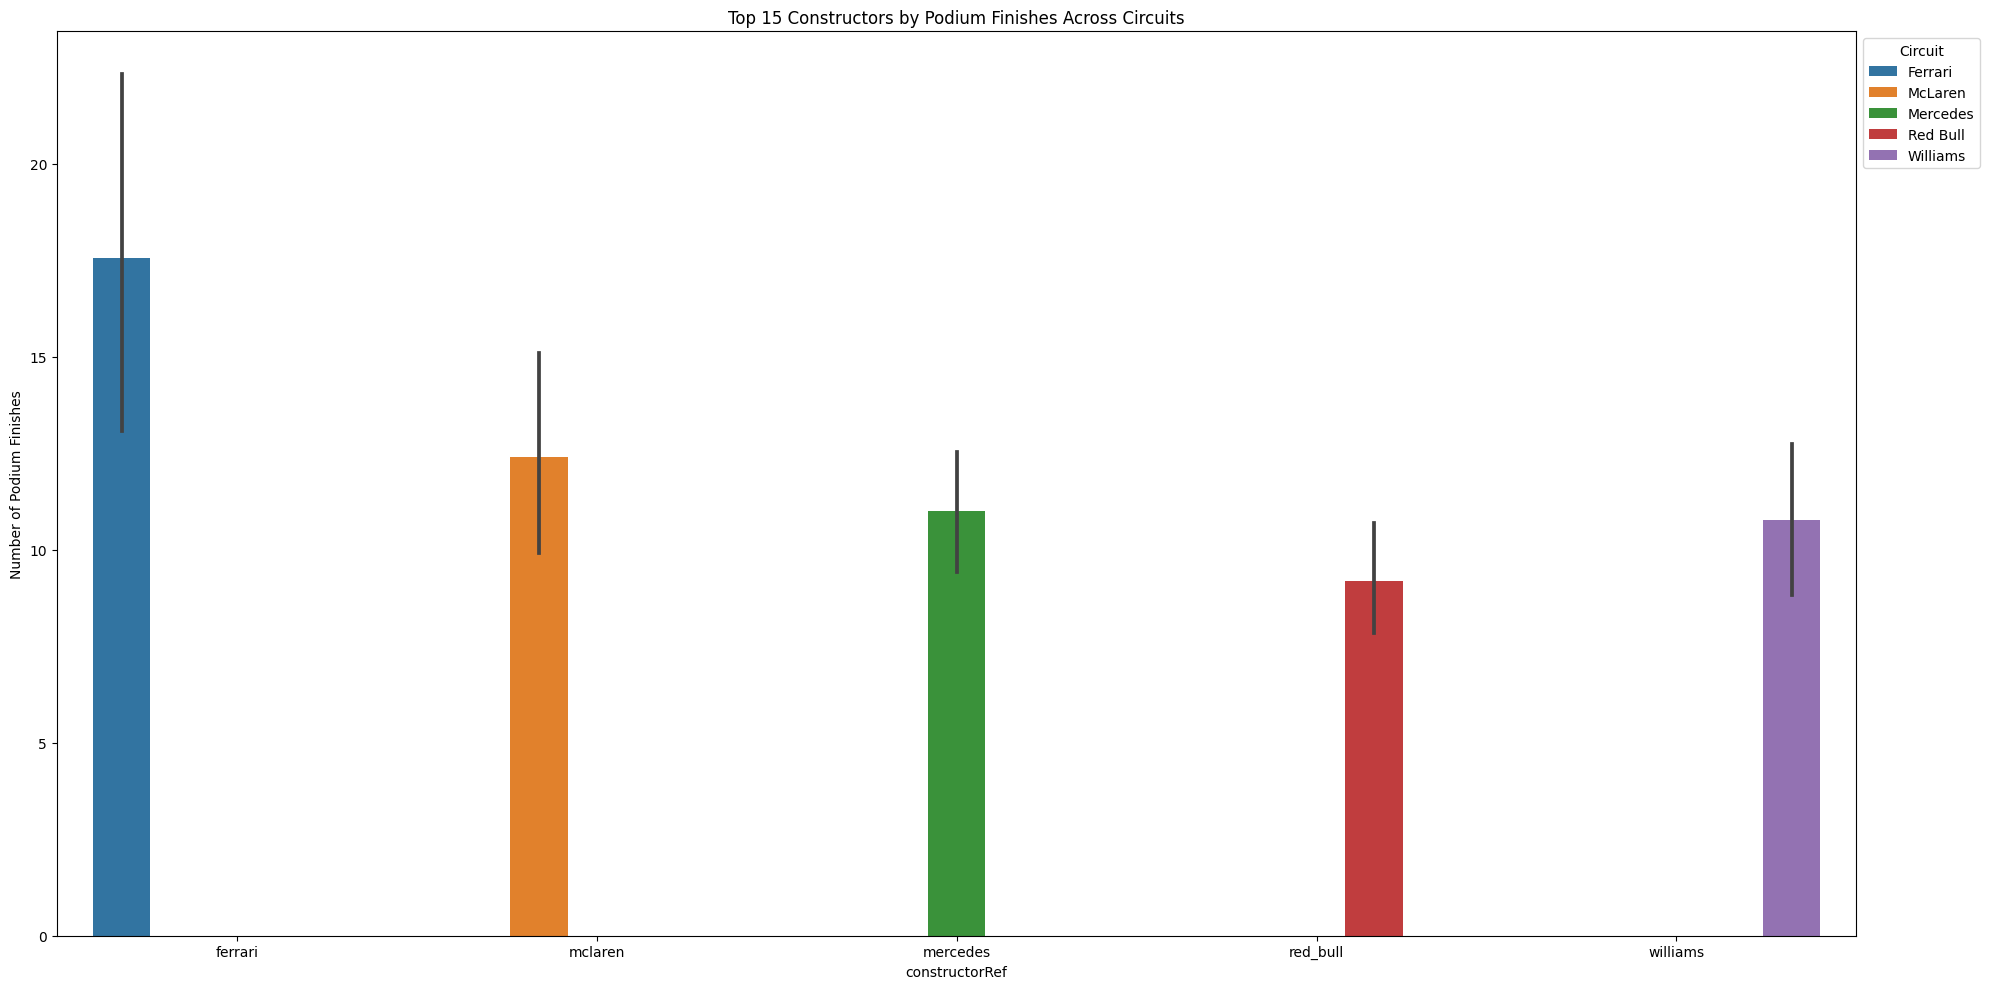

In [56]:
top_15_constructors = merged_df.groupby('constructorRef')['podium'].sum().nlargest(5).index.tolist()

# Filter the merged dataset for these top drivers
top_15_constructors = merged_df[merged_df['constructorRef'].isin(top_15_constructors)]

# Group by driver and circuit and sum the podiums
constructor_circuit_df = top_15_constructors.groupby(['constructorRef', 'circuitId', 'name_y'])['podium'].sum().reset_index()

# Filter for circuits where a driver has at least, say, 3 podium finishes
top_performers_df = constructor_circuit_df[constructor_circuit_df['podium'] > 3]

# Visualization
plt.figure(figsize=(20,10))
sns.barplot(x='constructorRef', y='podium', hue='name_y', data=top_performers_df)
plt.title('Top 15 Constructors by Podium Finishes Across Circuits')
plt.ylabel('Number of Podium Finishes')
# plt.xticks(rotation=90)
plt.legend(title='Circuit', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Consistency vs. Peaks: Analyze if certain drivers have more consistent performance across races, while others have peaks (strong performances followed by weak ones).

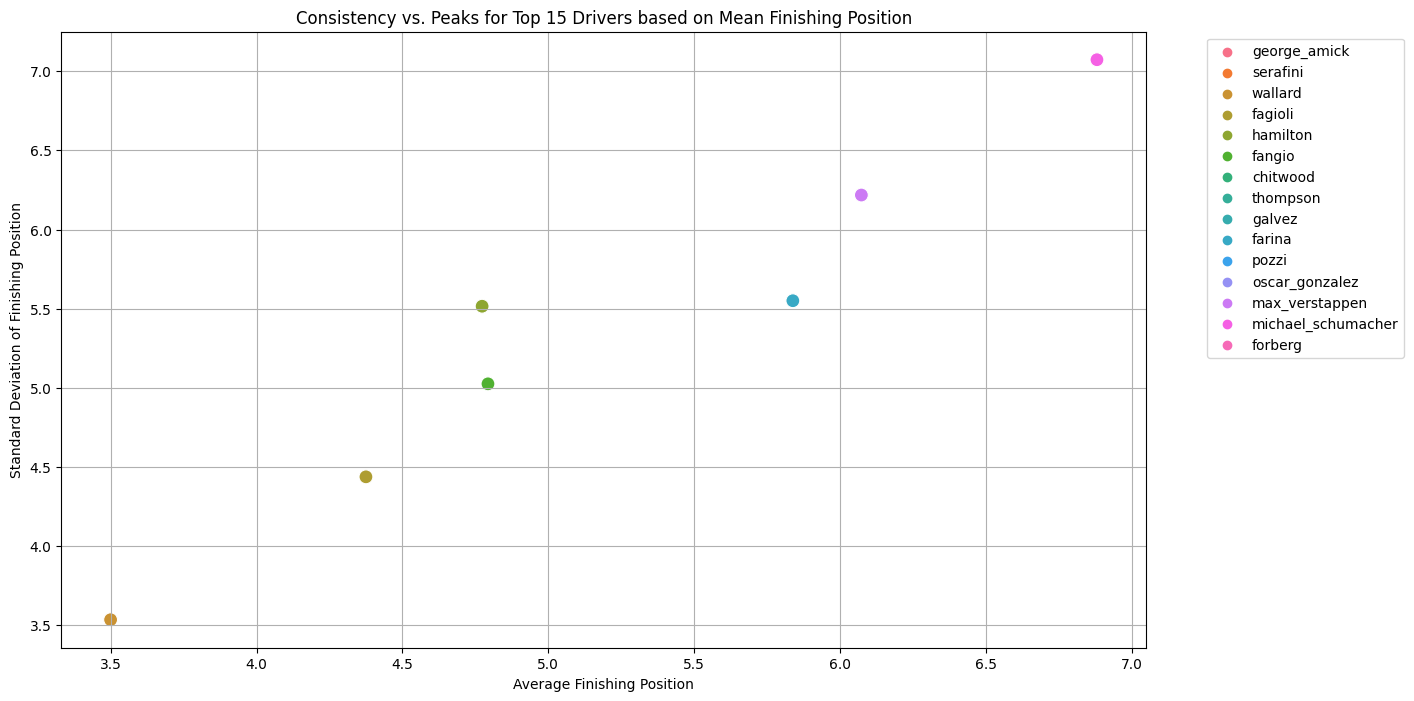

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is the combined dataframe from earlier
# Calculate mean and standard deviation for each driver's finishing positions
driver_stats = merged_df.groupby('driverRef')['positionOrder'].agg(['mean', 'std']).reset_index()

# Sort the dataframe by mean finishing position (ascend)
driver_stats = driver_stats.sort_values(by='mean').head(15)  # Taking the top 15 based on mean position

# Plotting
plt.figure(figsize=(14,8))
sns.scatterplot(data=driver_stats, x='mean', y='std', hue='driverRef', s=100)
plt.title('Consistency vs. Peaks for Top 15 Drivers based on Mean Finishing Position')
plt.xlabel('Average Finishing Position')
plt.ylabel('Standard Deviation of Finishing Position')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


n this scatter plot:

Drivers towards the left have a better average finishing position (i.e., they tend to finish higher).
The vertical position (standard deviation) indicates consistency: drivers lower on the plot have more consistent performances, while those higher up have more variable performances.
Interpretation:

Drivers in the bottom-left quadrant are both high-performing and consistent.
Drivers in the top-left quadrant are high-performing but have variable results (peaks and troughs).
Drivers in the bottom-right are consistent but tend to have a lower average finishing position.
Drivers in the top-right both perform lower on average and have variable results.

Evolution Over Time: How have drivers' or constructors' performances evolved over time? This could involve looking at winning streaks, periods of dominance, or improvement trajectories.

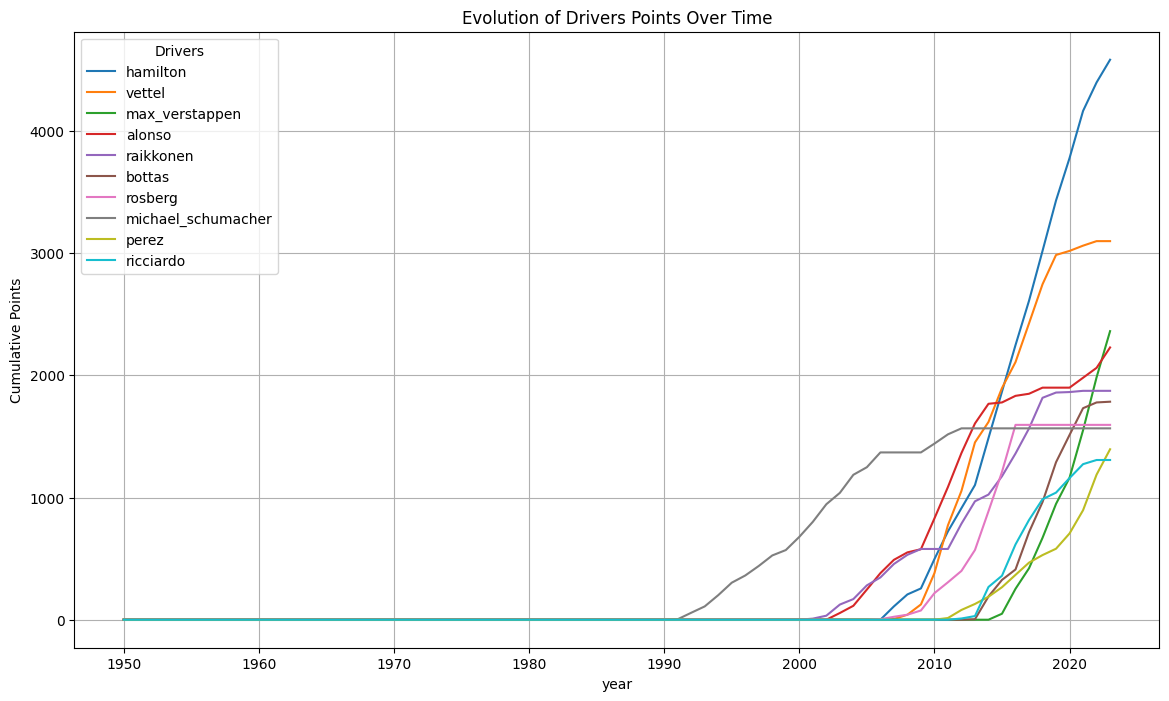

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df contains the merged dataset from earlier
# Group data by season and driver, and sum up points
driver_season_points = merged_df.groupby(['year', 'driverRef'])['points'].sum().reset_index()

# Pivot table to get drivers as columns and years as rows
pivot_driver_points = driver_season_points.pivot(index='year', columns='driverRef', values='points').fillna(0)

# Cumulatively sum the points over the years
cumulative_points = pivot_driver_points.cumsum()

# Plot the top drivers based on total points accumulated in the last year available in the dataset
top_drivers = cumulative_points.iloc[-1].sort_values(ascending=False).index[:10]
cumulative_points[top_drivers].plot(figsize=(14,8))
plt.title('Evolution of Drivers Points Over Time')
plt.ylabel('Cumulative Points')
plt.grid(True)
plt.legend(title='Drivers')
plt.show()


In [63]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,age
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,38
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,46
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,38
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,42
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,42
...,...,...,...,...,...,...,...,...,...,...
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu,24
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,28
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,22
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant,23


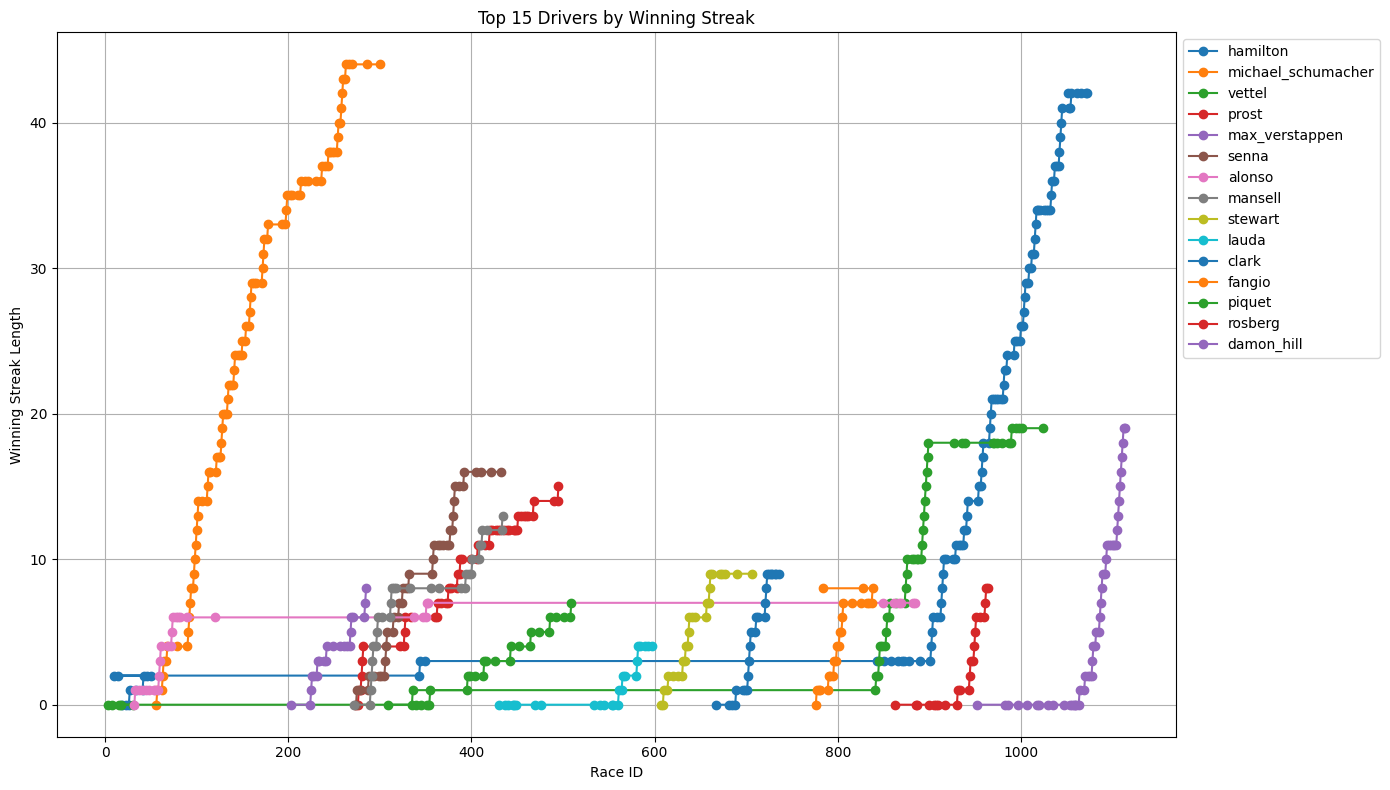

In [66]:

# Filter out the races won
winners = results[results['positionOrder'] == 1].copy()
winners = winners.merge(drivers[['driverId','driverRef']], how = 'left', on = 'driverId')

# Counting consecutive wins
winners['streak'] = winners.groupby('driverRef').cumcount() + 1
winners['prev_winner'] = winners.groupby('driverRef')['raceId'].shift(1)
winners['consecutive'] = (winners['raceId'] - winners['prev_winner']).fillna(2) == 1
winners['streak'] = winners.groupby('driverRef')['consecutive'].cumsum()

# Sorting and selecting top drivers
top_drivers = winners['driverRef'].value_counts().head(15).index
filtered_winners = winners[winners['driverRef'].isin(top_drivers)]

# Plotting the streaks
plt.figure(figsize=(14,8))

for driver in top_drivers:
    driver_data = filtered_winners[filtered_winners['driverRef'] == driver]
    plt.plot(driver_data['raceId'], driver_data['streak'], label=f"{driver}", marker='o')

plt.xlabel('Race ID')
plt.ylabel('Winning Streak Length')
plt.title('Top 15 Drivers by Winning Streak')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.tight_layout()
plt.show()


This code will create a plot of winning streaks for the top 15 drivers based on their total race wins. Each line in the plot represents one driver, and the y-value indicates the length of the winning streak up to that race.

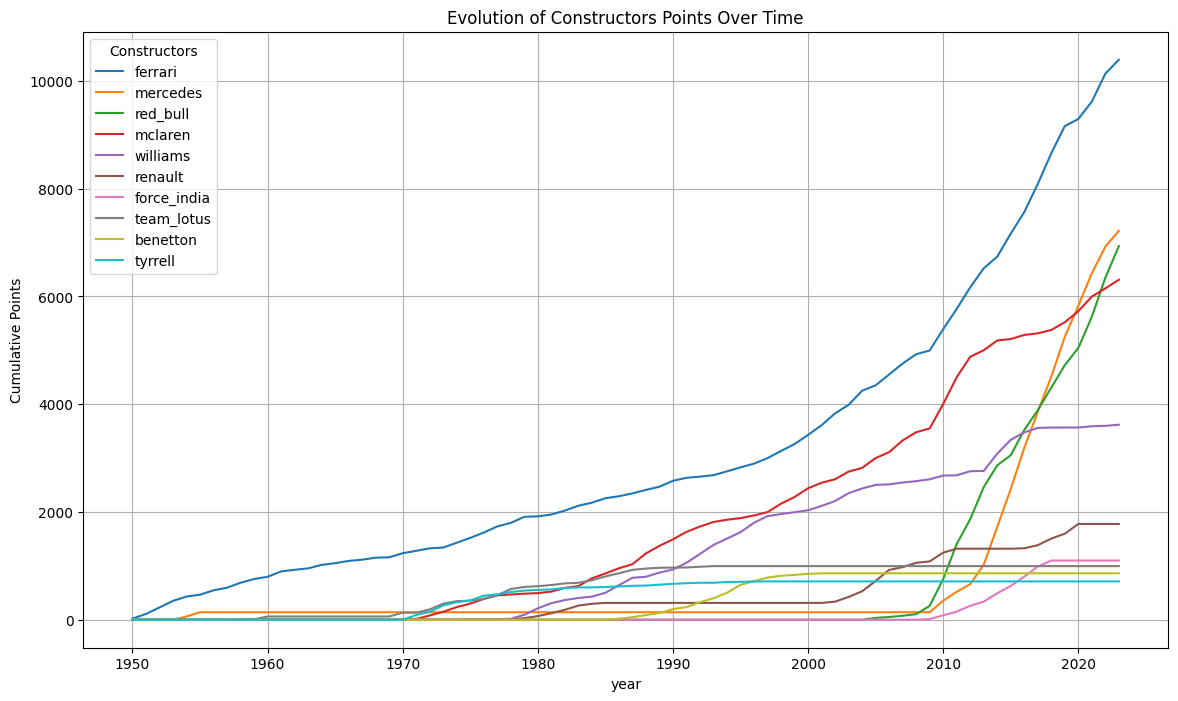

In [59]:
# Group data by season and constructor, and sum up points
constructor_season_points = merged_df.groupby(['year', 'constructorRef'])['points'].sum().reset_index()

# Pivot table to get constructors as columns and years as rows
pivot_constructor_points = constructor_season_points.pivot(index='year', columns='constructorRef', values='points').fillna(0)

# Cumulatively sum the points over the years
cumulative_constructor_points = pivot_constructor_points.cumsum()

# Plot the top constructors based on total points accumulated in the last year
top_constructors = cumulative_constructor_points.iloc[-1].sort_values(ascending=False).index[:10]
cumulative_constructor_points[top_constructors].plot(figsize=(14,8))
plt.title('Evolution of Constructors Points Over Time')
plt.ylabel('Cumulative Points')
plt.grid(True)
plt.legend(title='Constructors')
plt.show()


Interpretation:
Growth trajectories: A steady upward trajectory in the cumulative points graphs for a driver or constructor indicates consistent improvement and dominance over time.
Dominance: Periods where a driver or constructor consistently finishes at the top or accumulates a significant amount of points more than competitors indicate dominance.
Winning streaks: Consecutive wins showcase a period of sheer dominance by a driver.

In [74]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,age
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,38
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,46
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,38
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,42
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,42
...,...,...,...,...,...,...,...,...,...,...
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu,24
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,28
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,22
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant,23


Age vs. Performance: Does a driver's performance peak at a certain age? Are younger drivers faster in qualifying but less consistent in races?

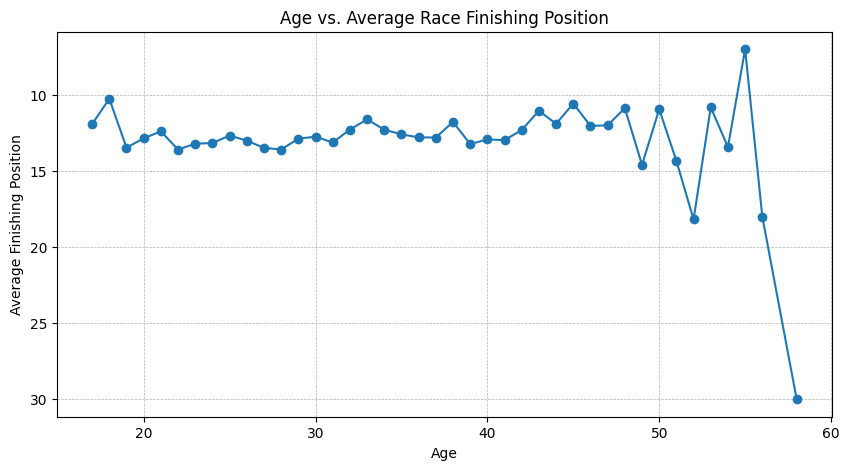

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'results', 'drivers', and 'races' dataframes are loaded

# Merge 'results' with 'races' to get the date of each race
results_with_date = results.merge(races[['raceId', 'date']], on='raceId', how='left')

# Merge this combined dataframe with 'drivers' to get driver's date of birth
results_with_age = results_with_date.merge(drivers[['driverId', 'dob']], on='driverId', how='left')

# Calculate the age for each result
results_with_age['date'] = pd.to_datetime(results_with_age['date'])
results_with_age['dob'] = pd.to_datetime(results_with_age['dob'])
results_with_age['age'] = (results_with_age['date'] - results_with_age['dob']).dt.days // 365

# Calculate average finishing position by age
avg_position_by_age = results_with_age.groupby('age')['positionOrder'].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_position_by_age, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average Finishing Position')
plt.title('Age vs. Average Race Finishing Position')
plt.gca().invert_yaxis()  # Lower finishing position is better
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


Strategy Insights Using Pit Stop Data:

To infer strategies from pit stop data, we would look at the average lap on which teams perform their pit stops. Early pitting might suggest aggressive strategies, aiming for an undercut, while late pitting might suggest endurance-focused strategies or trying to capitalize on tire degradation for opponents.

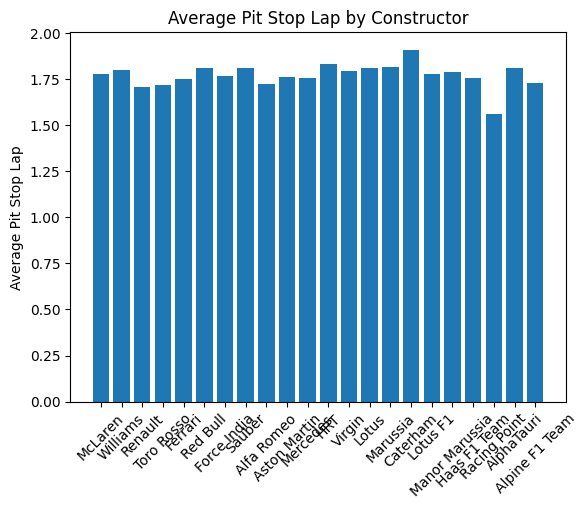

In [76]:
# Assuming 'pit_stops' and 'constructors' datasets are loaded
pit_stops['stop'] = pit_stops['stop'].astype(int)
pit_avg_by_constructor = pit_stops.merge(results, on=['raceId', 'driverId']).groupby('constructorId')['stop'].mean().reset_index()
pit_avg_by_constructor = pit_avg_by_constructor.merge(constructors, on='constructorId')
plt.bar(pit_avg_by_constructor['name'], pit_avg_by_constructor['stop'])
plt.xticks(rotation=45)
plt.ylabel('Average Pit Stop Lap')
plt.title('Average Pit Stop Lap by Constructor')
plt.show()

Weather Strategy:

Teams might adjust their strategies based on weather predictions. The correlation between weather conditions (like rain) and pit stop frequency could shed light on this.
Some teams may perform better under specific conditions (like rain), which could be analyzed by checking race results during such conditions.

Car Reliability:

Using the 'status' data, we can look at non-finishes related to technical reasons

In [83]:
results = results.merge(status, on = 'statusId', how= 'left')

In [86]:
# Assuming the dataframe containing race results is named 'results_df'

# Define the categories
finished_positional = ['Finished'] + [f'+{i} Laps' for i in range(1, 50)]
technical_failures = ['Engine', 'Gearbox', 'Transmission', 'Clutch', 'Hydraulics', 'Electrical', 'Radiator', 'Suspension', 'Brakes',
                      'Differential', 'Overheating', 'Mechanical', 'Tyre', 'Driveshaft', 'Fuel pressure', 'Front wing',
                      'Water pressure', 'Wheel', 'Throttle', 'Steering', 'Technical', 'Electronics', 'Heat shield fire',
                      'Exhaust', 'Oil leak', 'Wheel rim', 'Water leak', 'Fuel pump', 'Oil pressure', 'Engine fire',
                      'Engine misfire', 'Tyre puncture', 'Out of fuel', 'Wheel nut', 'Pneumatics', 'Rear wing', 'Wheel bearing',
                      'Fuel system', 'Oil line', 'Battery', 'Stalled', 'Halfshaft', 'Crankshaft', 'Alternator', 'Oil pump',
                      'Fuel leak', 'Injection', 'Distributor', 'Turbo', 'CV joint', 'Water pump', 'Spark plugs', 'Fuel pipe',
                      'Oil pipe', 'Axle', 'Water pipe', 'Magneto', 'Supercharger', 'Power Unit', 'ERS', 'Brake duct', 'Cooling system']
accidents_collisions = ['Accident', 'Collision', 'Spun off', 'Collision damage']
disqualifications_regulations = ['Disqualified', '107% Rule', 'Did not qualify', 'Did not prequalify', 'Underweight', 'Excluded']
external_factors = ['Debris', 'Fire', 'Safety concerns', 'Safety', 'Safety belt', 'Physical', 'Injured', 'Injury', 'Fatal accident',
                    'Eye injury', 'Driver unwell', 'Illness']
other = ['Retired', 'Driver Seat', 'Puncture', 'Refuelling', 'Withdrew', 'Handling', 'Fire', 'Vibrations', 'Drivetrain', 'Ignition',
         'Chassis', 'Seat', 'Damage']
unknown_general = ['Retired', 'Not classified']

# Map the statuses to their categories
def categorize_status(status):
    if status in finished_positional:
        return 'Finished/Positional'
    if status in technical_failures:
        return 'Technical Failures'
    if status in accidents_collisions:
        return 'Accidents/Collisions'
    if status in disqualifications_regulations:
        return 'Disqualifications/Regulations'
    if status in external_factors:
        return 'External Factors'
    if status in other:
        return 'Other'
    if status in unknown_general:
        return 'Unknown/General'
    return 'Miscellaneous' # For statuses not categorized above

# Apply the categorization to the dataframe
results['status_category'] = results['status'].apply(categorize_status)

# Analyze the data
status_counts = results['status_category'].value_counts()
print(status_counts)


Finished/Positional              10738
Technical Failures                6370
Miscellaneous                     3940
Accidents/Collisions              2737
Disqualifications/Regulations     1517
Other                              610
Unknown/General                    172
External Factors                    76
Name: status_category, dtype: int64


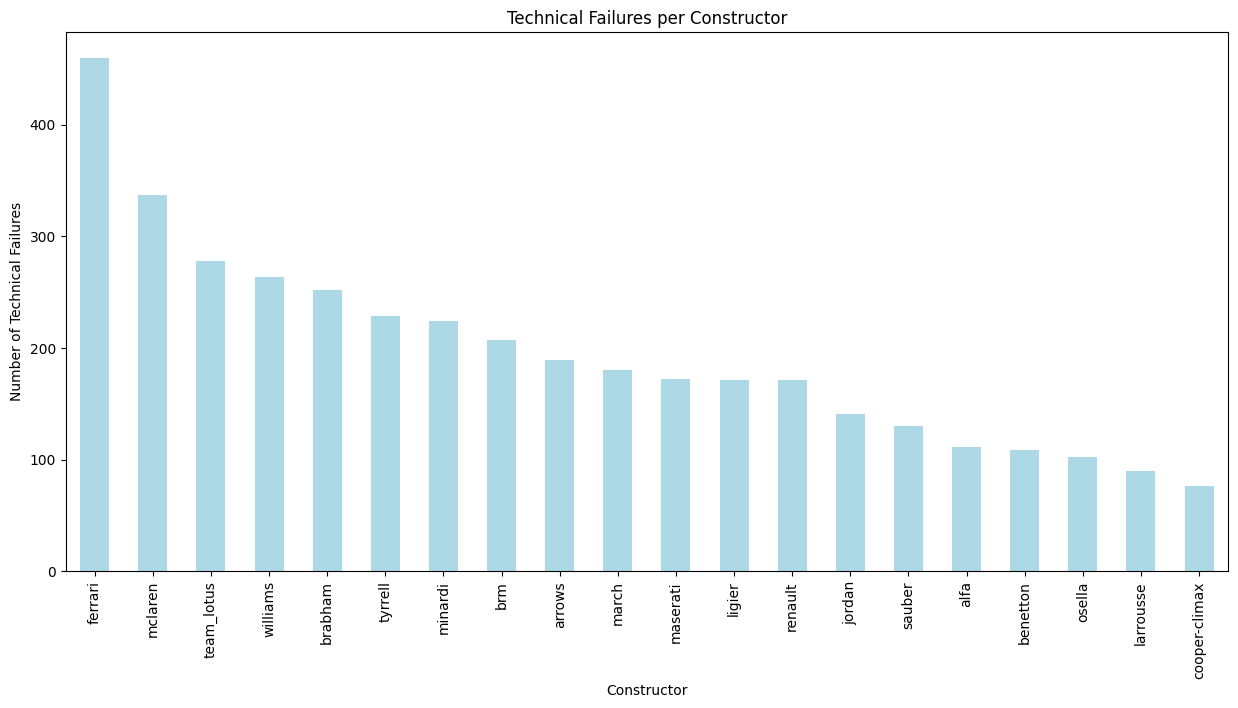

In [90]:
technical_failures_df = results[results['status_category'] == 'Technical Failures']
technical_failures_df = technical_failures_df.merge(constructors[['constructorId','constructorRef']])
reliability_counts = technical_failures_df['constructorRef'].value_counts().head(20)

reliability_counts.plot(kind='bar', figsize=(15,7), color='lightblue')
plt.title('Technical Failures per Constructor')
plt.xlabel('Constructor')
plt.ylabel('Number of Technical Failures')
plt.show()


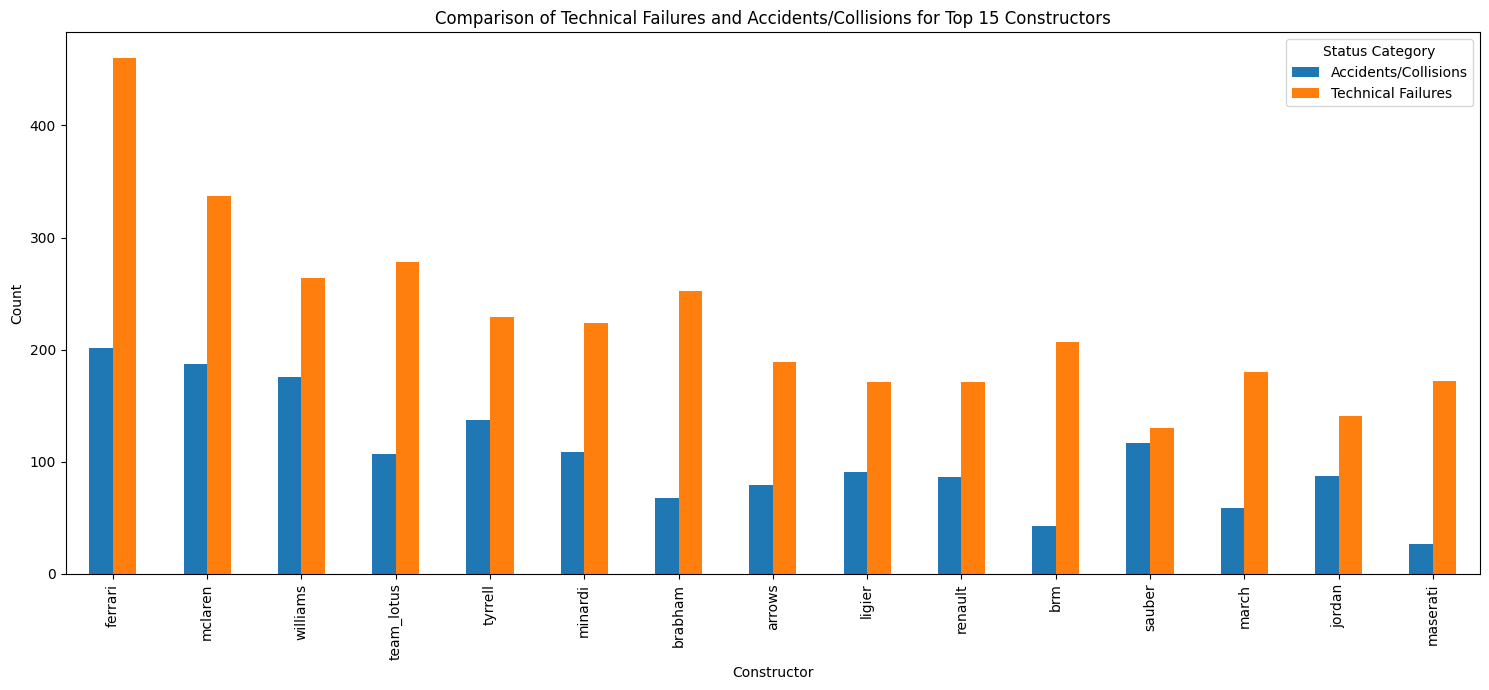

In [95]:
# Filter the results dataset to keep only rows with "Technical Failures" or "Accidents/Collisions"
teams_issues = results[results['status_category'].isin(['Technical Failures', 'Accidents/Collisions'])]

# Merge with constructors dataset to get the constructor names
teams_issues = teams_issues.merge(constructors[['constructorId', 'constructorRef']], on='constructorId')

# Create a DataFrame with counts of each issue type per constructor
teams_issues_counts = teams_issues.groupby('constructorRef')['status_category'].value_counts().unstack().fillna(0)

# Sum the counts for each constructor and get the top 15
top_15_constructors = teams_issues_counts.sum(axis=1).nlargest(15).index

# Filter the counts DataFrame to keep only the top 15 constructors
teams_issues_counts_top_15 = teams_issues_counts.loc[top_15_constructors]

# Plot the data
teams_issues_counts_top_15.plot(kind='bar', stacked=False, figsize=(15,7))
plt.title('Comparison of Technical Failures and Accidents/Collisions for Top 15 Constructors')
plt.xlabel('Constructor')
plt.ylabel('Count')
plt.tight_layout()
plt.legend(title="Status Category")
plt.show()


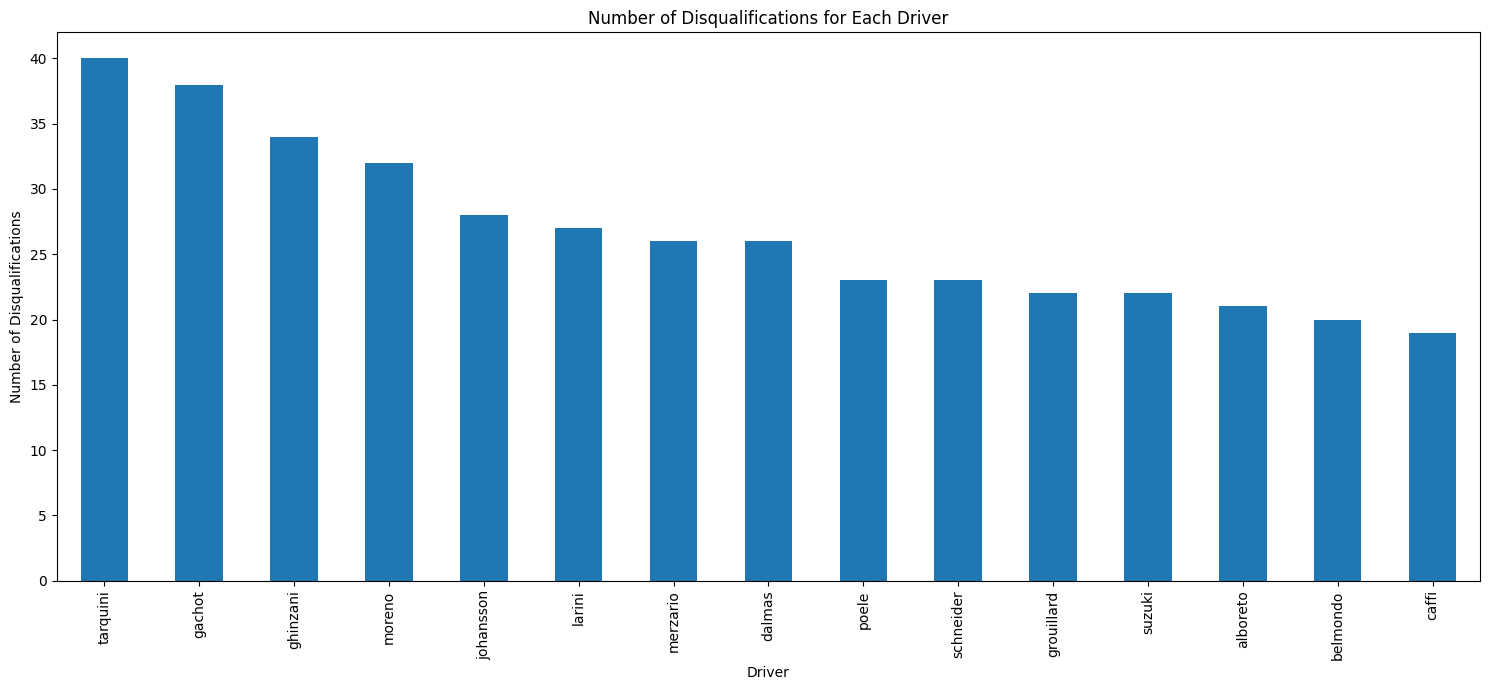

In [108]:
results_merged = results.merge(drivers[['driverId', 'driverRef']], on='driverId')
results_merged = results_merged.merge(races[['raceId', 'circuitId']], on='raceId')
results_merged = results_merged.merge(circuits[['circuitId', 'circuitRef']], on='circuitId')


dq_counts = results_merged[results_merged['status_category'] == 'Disqualifications/Regulations']['driverRef'].value_counts().head(15)

# Plotting the number of disqualifications for each driver
plt.figure(figsize=(15, 7))
dq_counts.plot(kind='bar')
plt.title('Number of Disqualifications for Each Driver')
plt.xlabel('Driver')
plt.ylabel('Number of Disqualifications')
plt.tight_layout()
plt.show()

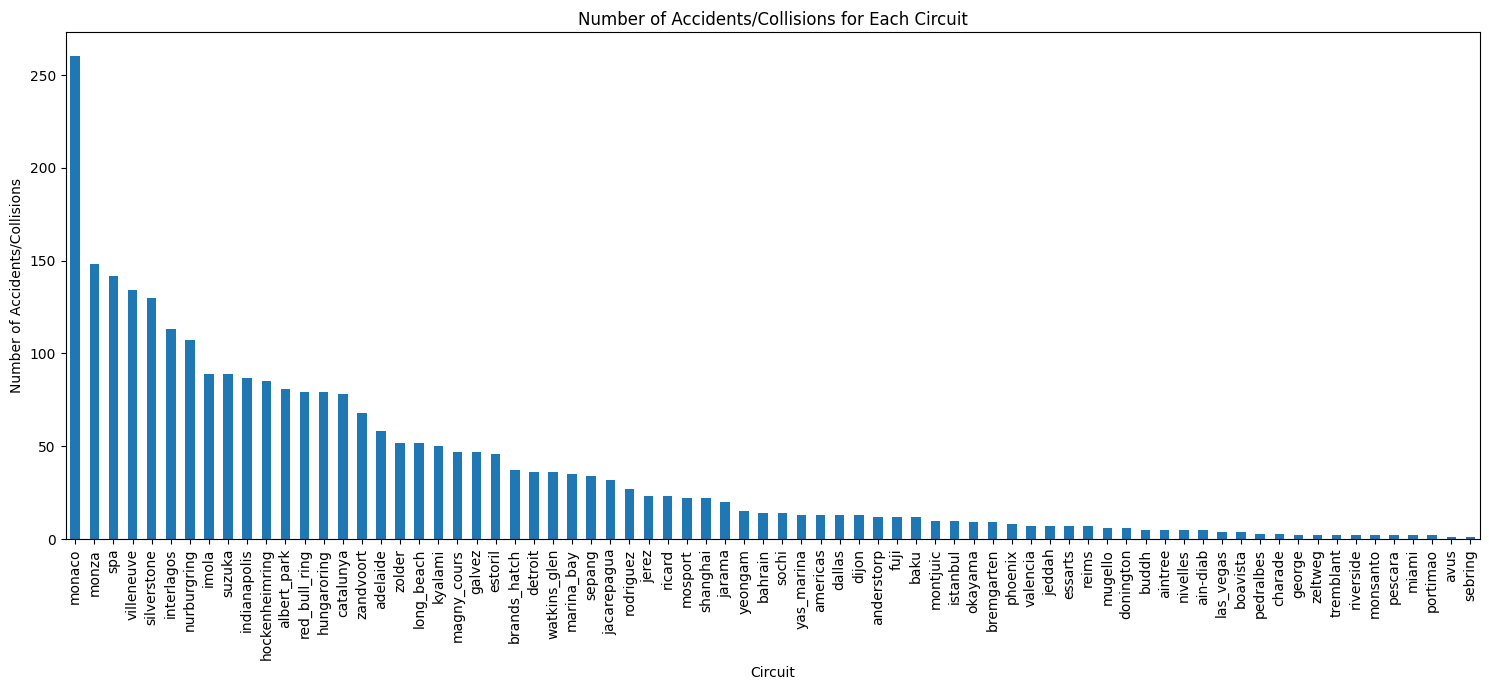

In [109]:
# 2. Accidents per Circuit
accident_counts = results_merged[results_merged['status_category'] == 'Accidents/Collisions']['circuitRef'].value_counts()

# Plotting the number of accidents for each circuit
plt.figure(figsize=(15, 7))
accident_counts.plot(kind='bar')
plt.title('Number of Accidents/Collisions for Each Circuit')
plt.xlabel('Circuit')
plt.ylabel('Number of Accidents/Collisions')
plt.tight_layout()
plt.show()

External Factor Analytics:



Effect of Altitude: Given that you have altitude data for circuits, does higher altitude (which affects air density and, consequently, downforce and engine performance) favor certain teams or drivers?

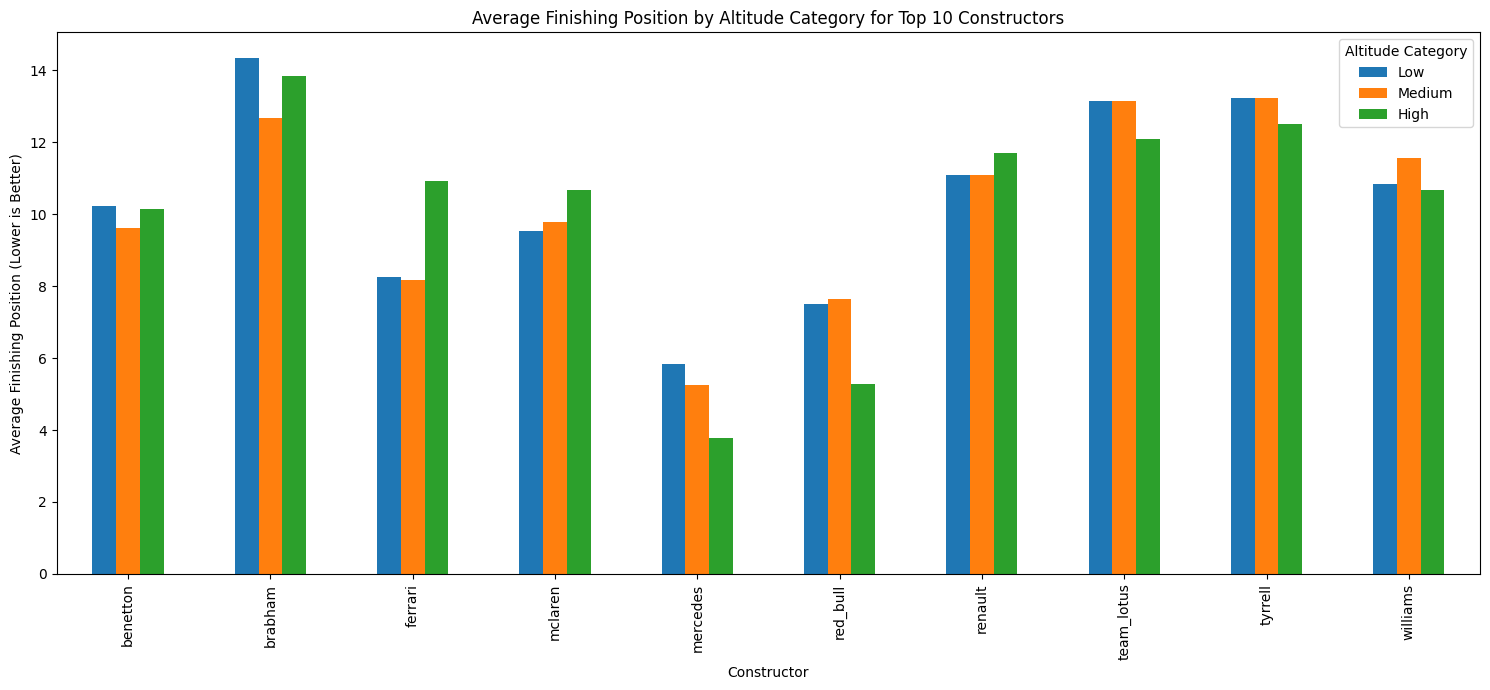

In [118]:
circuits['altitude_category'] = pd.cut(circuits['alt'],
                                       bins=[0, 500, 1000, float('inf')],
                                       labels=['Low', 'Medium', 'High'])

merged_data = results.merge(races[['raceId', 'circuitId']], on='raceId')
merged_data = merged_data.merge(circuits[['circuitId', 'altitude_category']], on='circuitId')
merged_data = merged_data.merge(constructors[['constructorId', 'constructorRef']], on='constructorId')

# Calculate top 10 constructors by total race wins
top_constructors = merged_data[merged_data['positionOrder'] == 1]['constructorRef'].value_counts().head(10).index.tolist()

# Filter the merged data to include only top constructors
filtered_data = merged_data[merged_data['constructorRef'].isin(top_constructors)]

# Calculate average position by constructor and altitude
constructor_performance = filtered_data.groupby(['constructorRef', 'altitude_category'])['positionOrder'].mean().unstack()

# Plotting
constructor_performance.plot(kind='bar', figsize=(15, 7))
plt.title('Average Finishing Position by Altitude Category for Top 10 Constructors')
plt.ylabel('Average Finishing Position (Lower is Better)')
plt.xlabel('Constructor')
plt.tight_layout()
plt.legend(title='Altitude Category')
plt.show()



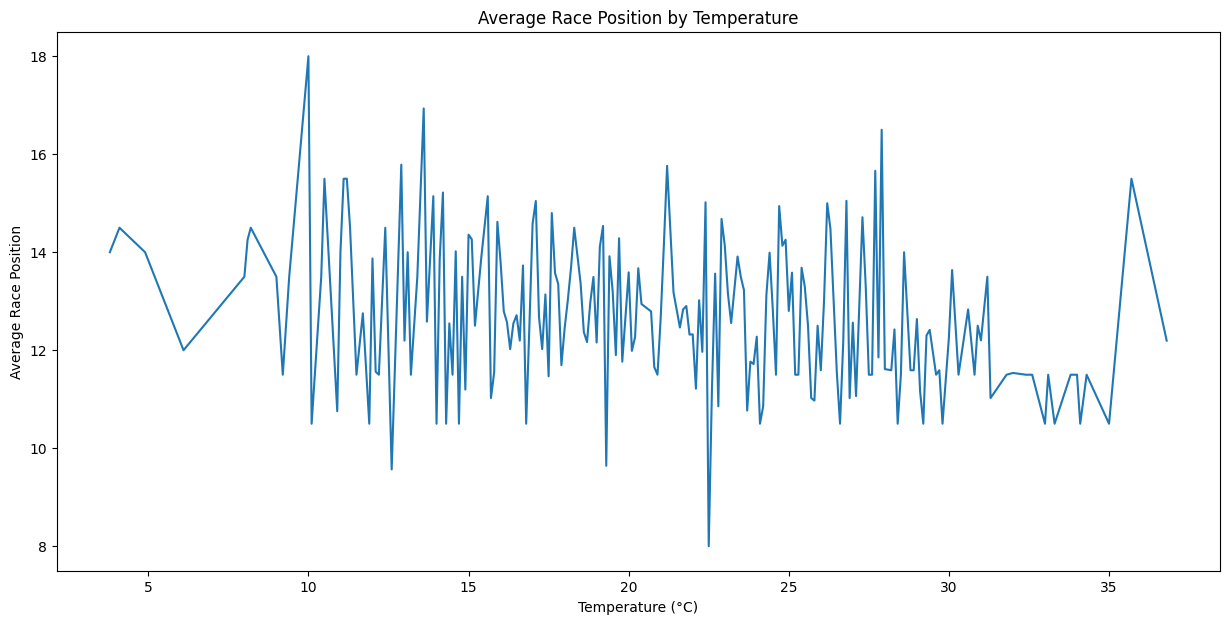

In [129]:
# Assuming `results`, `races`, and `weather_data` are the names of your dataframes.
merged_temp_data = results.merge(races, on="raceId").merge(weather_data_per_race[['raceId','temp']].drop_duplicates(), on="raceId")

# Grouping by race and calculating average race position
average_position_by_temp = merged_temp_data.groupby('temp')['positionOrder'].mean()

# Plotting
average_position_by_temp.plot(figsize=(15, 7))
plt.title('Average Race Position by Temperature')
plt.ylabel('Average Race Position')
plt.xlabel('Temperature (°C)')
plt.show()


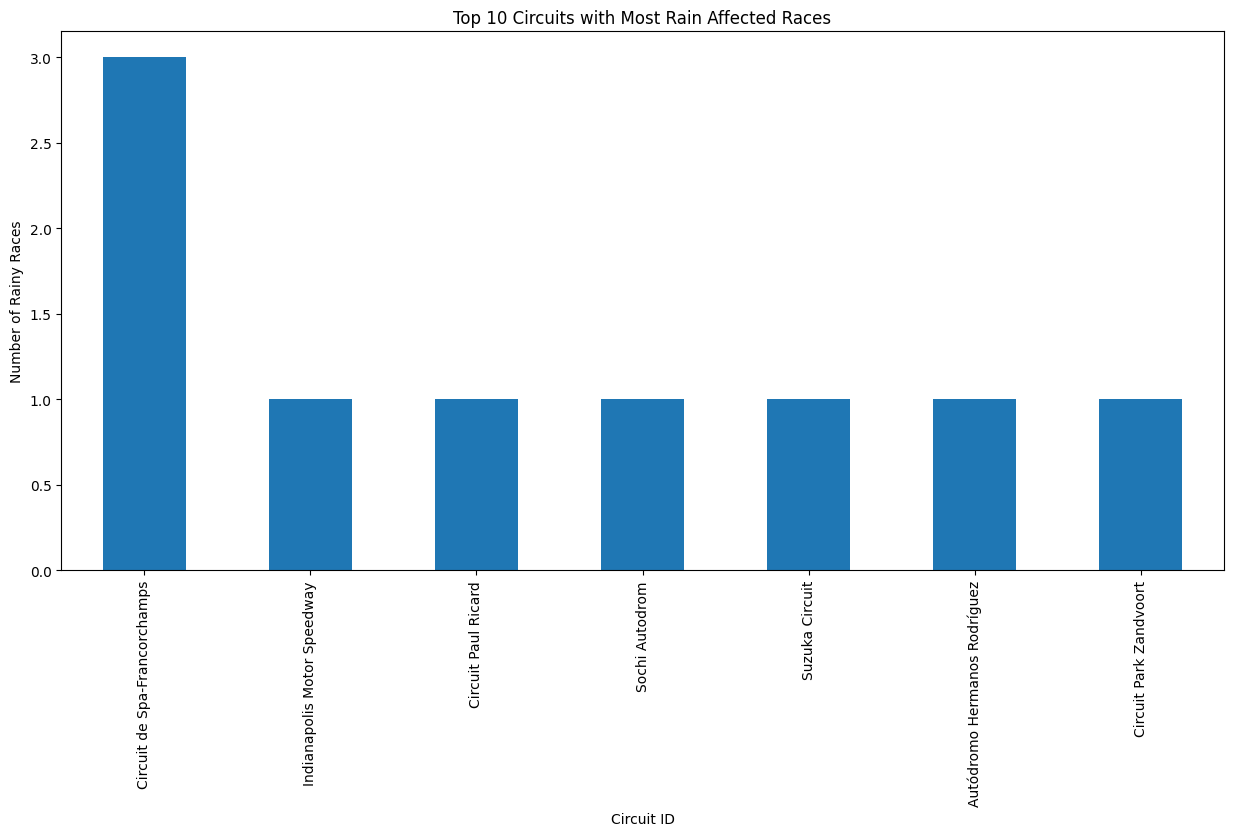

In [126]:
rainy_races = weather_data_per_race[weather_data_per_race['prcp'] > 0] # adjust threshold if needed

rainy_races = rainy_races.merge(circuits[['circuitId', 'name']], on='circuitId')

# Circuits with most rain-affected races
rainy_circuits = rainy_races['name_y'].value_counts()

# Plotting
rainy_circuits.head(10).plot(kind='bar', figsize=(15,7))
plt.title('Top 10 Circuits with Most Rain Affected Races')
plt.ylabel('Number of Rainy Races')
plt.xlabel('Circuit ID')
plt.show()


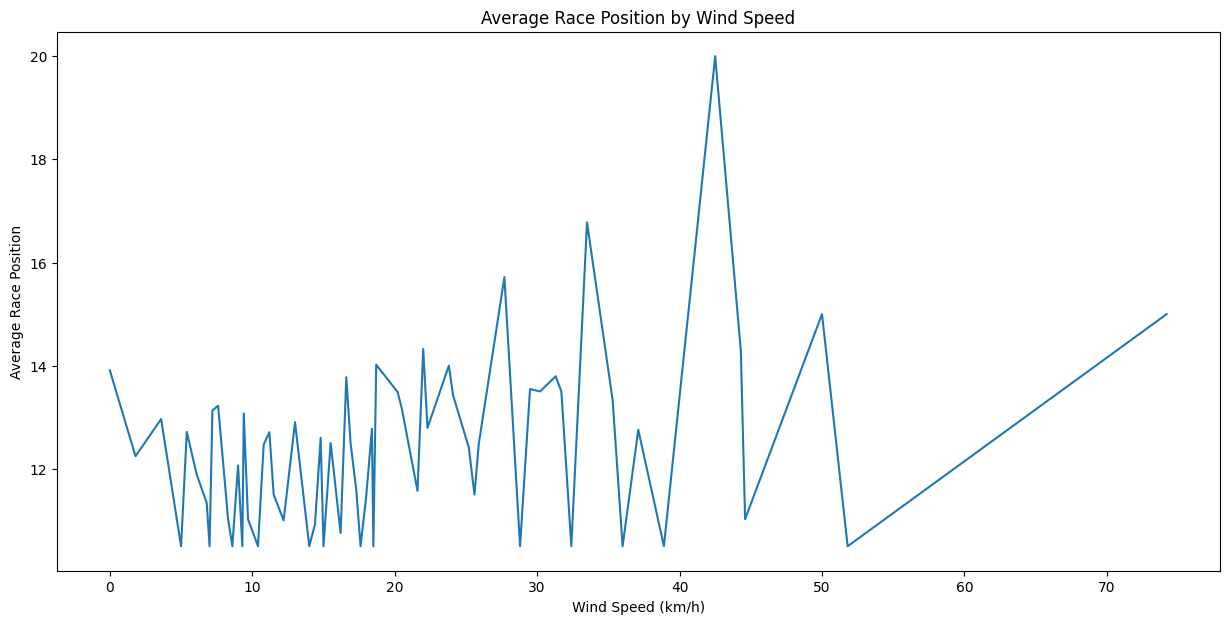

In [131]:
merged_wind_data = results.merge(races, on="raceId").merge(weather_data_per_race[['raceId','wspd']].drop_duplicates(), on="raceId")

# Average race position by wind speed
average_position_by_wind = merged_wind_data.groupby('wspd')['positionOrder'].mean()

# Plotting
average_position_by_wind.plot(figsize=(15,7))
plt.title('Average Race Position by Wind Speed')
plt.ylabel('Average Race Position')
plt.xlabel('Wind Speed (km/h)')
plt.show()
